In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
#import pywt
import matplotlib.patches as patches

In [5]:
my_list=[]
file_list= glob.glob('/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda')
print(file_list)
path= '/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda/*.txt'
for i in sorted(glob.glob(path)):
  print(i)
for i in sorted(glob.glob(path)):
  df=pd.read_csv(i,delimiter=';',encoding="ISO-8859-1",header=0,)
  my_list.append(df)
  #sorted(my_list)
  df_U_I_concat_f_onda_casa2=pd.concat(my_list,join="inner", ignore_index=True)
  df_U_I_concat_f_onda_casa2

['/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda']
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda/domiciliario4corrientes_04_000.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda/domiciliario4corrientes_04_0000.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda/domiciliario4corrientes_04_00000.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda/domiciliario4corrientes_04_000000.txt
/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda/domiciliario4corrientes_04_0

In [6]:
df_U_I_concat_f_onda_casa2


Datos X  AIValor[Amperios]  BIValor[Amperios]  \
0       17/01/2023 13:18:33.808653116           0.000927           0.000000   
1       17/01/2023 13:18:33.808730840           0.003706          -0.000900   
2       17/01/2023 13:18:33.808808565           0.001853          -0.011100   
3       17/01/2023 13:18:33.808886289           0.000000           0.007433   
4       17/01/2023 13:18:33.808964014          -0.000900           0.008362   
...                               ...                ...                ...   
322555  14/10/2021 15:53:46.997381448          -0.922800          -0.025100   
322556  14/10/2021 15:53:46.997459411          -0.908000          -0.031600   
322557  14/10/2021 15:53:46.997537612          -0.893100          -0.028800   
322558  14/10/2021 15:53:46.997615575          -0.874600          -0.029700   
322559  14/10/2021 15:53:46.997694015          -0.860700          -0.030700   

        CIValor[Amperios]  DIValor[Amperios]  
0               -0.002800          -0.000900  
1                0.000928           0.000000  
2                0.001857           0.000000  
3                0.000000          -0.000900  
4               -0.001900           0.000928  
...                   ...                ...  
322555           0.000928           0.925500  
322556          -0.000900           0.916300  
322557           0.001857           0.905100  
322558           0.000928           0.881900  
322559          -0.000900           0.868900  

[322560 rows x 5 columns]

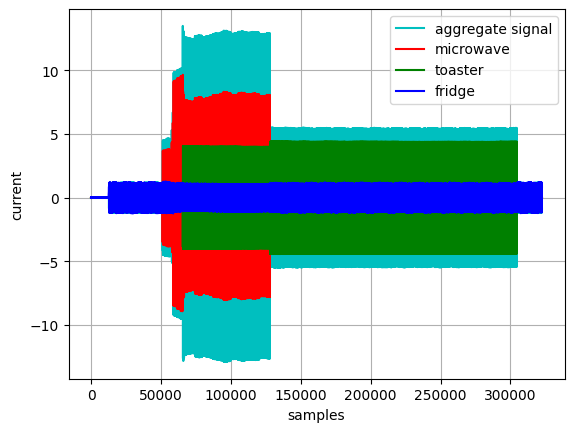

In [10]:
plt.plot(df_U_I_concat_f_onda_casa2['AIValor[Amperios]'], color='c', label='aggregate signal')
plt.plot(df_U_I_concat_f_onda_casa2['BIValor[Amperios]'], color='r', label='microwave')
plt.plot(df_U_I_concat_f_onda_casa2['CIValor[Amperios]'], color='g', label='toaster')
plt.plot(df_U_I_concat_f_onda_casa2['DIValor[Amperios]'], color='b', label='fridge')
plt.xlabel('samples')
plt.ylabel('current')
plt.grid()
plt.legend()
#plt.title('aggregate signal')
plt.savefig('signals_pura_1')

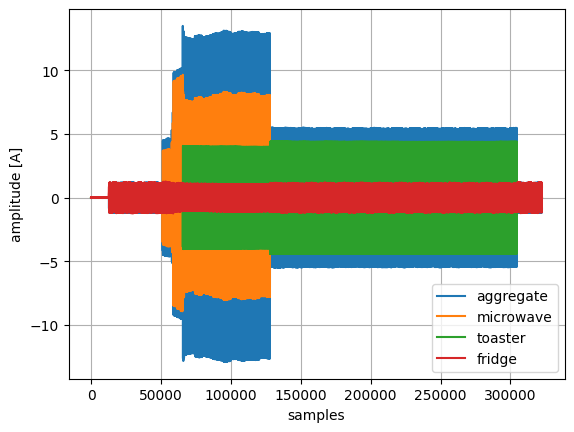

In [11]:
#plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['AVValor[Voltios]'])   ##corriente total
#plt.figure(figsize=(20,10))
plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['AIValor[Amperios]'],label='aggregate')   ##corriente total
plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['BIValor[Amperios]'],label='microwave')
plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['CIValor[Amperios]'],label='toaster')
plt.plot(df_U_I_concat_f_onda_casa2.index, df_U_I_concat_f_onda_casa2['DIValor[Amperios]'],label='fridge')

#leg = plt.legend(loc="upper right", fontsize=15)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

plt.legend(loc='lower right')
plt.rc('legend', fontsize='medium')

plt.xlabel('samples')
plt.ylabel('amplitude [A]')


#plt.title("synchronous currents signals at 2560 samples/s",
       #   fontdict={'family': 'serif',
        #            'color' : 'black',
         #           'weight': 'bold',
          #          'size': 25})

plt.grid(True)

plt.savefig('ds1_mod')
#plt.savefig('ds1', bbox_inches='tight')

plt.show()

In [12]:
import os          ###Cantidad de archivos en el directorio raíz.
initial_count = 0
dir = "/content/drive/MyDrive/Doctorado CyT, Maxi/DataSet - doctorado/Desagregado-adhoc/Casa_MaPa/1_heladera, tostadora, microondas/U_I_FdeOnda"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

126


In [13]:
lst = list(range(0,2560*initial_count,2560))
print(lst)

[0, 2560, 5120, 7680, 10240, 12800, 15360, 17920, 20480, 23040, 25600, 28160, 30720, 33280, 35840, 38400, 40960, 43520, 46080, 48640, 51200, 53760, 56320, 58880, 61440, 64000, 66560, 69120, 71680, 74240, 76800, 79360, 81920, 84480, 87040, 89600, 92160, 94720, 97280, 99840, 102400, 104960, 107520, 110080, 112640, 115200, 117760, 120320, 122880, 125440, 128000, 130560, 133120, 135680, 138240, 140800, 143360, 145920, 148480, 151040, 153600, 156160, 158720, 161280, 163840, 166400, 168960, 171520, 174080, 176640, 179200, 181760, 184320, 186880, 189440, 192000, 194560, 197120, 199680, 202240, 204800, 207360, 209920, 212480, 215040, 217600, 220160, 222720, 225280, 227840, 230400, 232960, 235520, 238080, 240640, 243200, 245760, 248320, 250880, 253440, 256000, 258560, 261120, 263680, 266240, 268800, 271360, 273920, 276480, 279040, 281600, 284160, 286720, 289280, 291840, 294400, 296960, 299520, 302080, 304640, 307200, 309760, 312320, 314880, 317440, 320000]


In [14]:
windows=[]

for i in lst:
  df_i=df_U_I_concat_f_onda_casa2.iloc[i:i+2560,:]
  windows.append(df_i)

In [15]:
len(windows)    ###Se comprueba que son los 21 archivos en alta frecuencia.

126

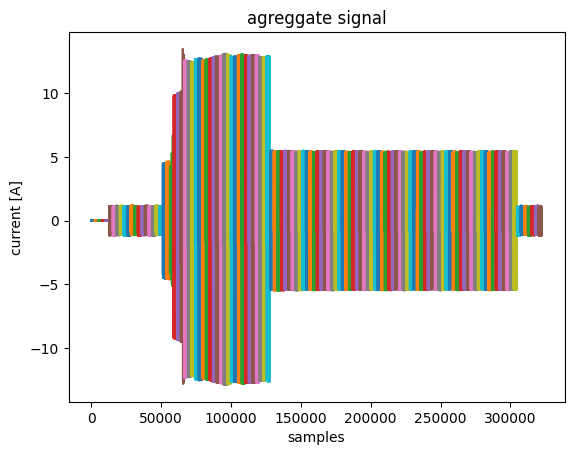

In [16]:
#plt.figure(figsize=(20,10))
i=0
while i<len(windows):
  pf=windows[i]

  plt.plot(pf['AIValor[Amperios]'])

  i=i+1

ax = plt.gca()

rect = patches.Rectangle((55000,-15),
                 2577,
                 50,
                 linewidth=3,
                 edgecolor='blue',
                 fill = False)

#ax.add_patch(rect)

plt.title('agreggate signal')

plt.xlabel('samples')
plt.ylabel('current [A]')


plt.savefig('frames_aggregate_signal')

plt.show()

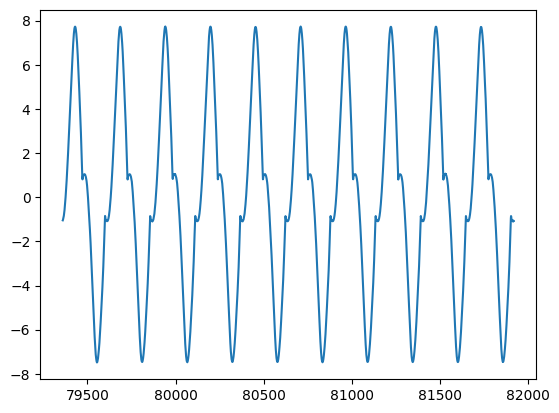

In [18]:
 plt.plot(windows[31]['BIValor[Amperios]'])

windows 0


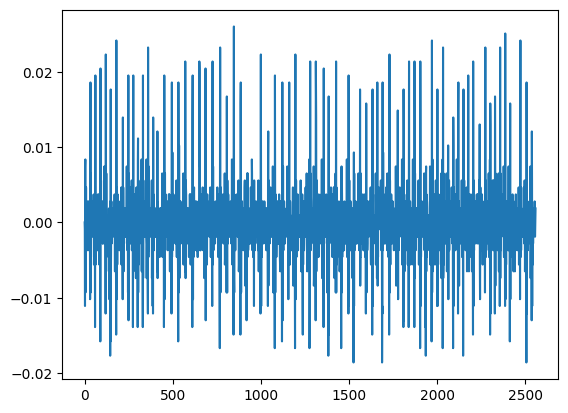

windows 1


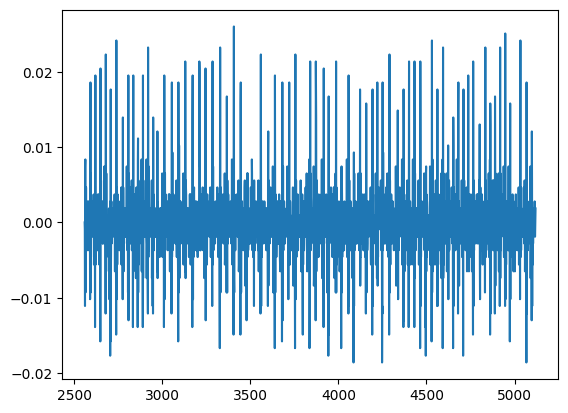

windows 2


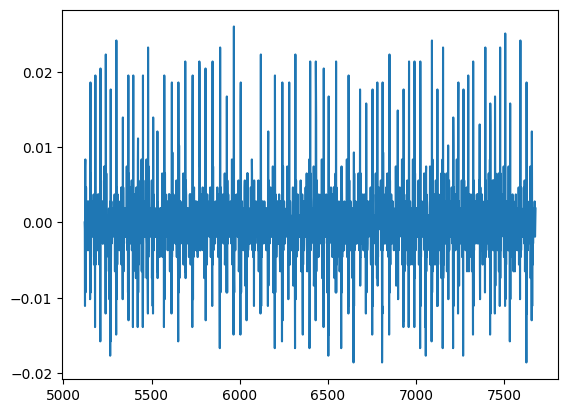

windows 3


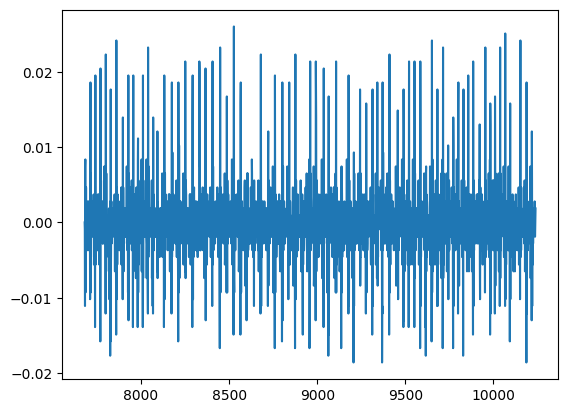

windows 4


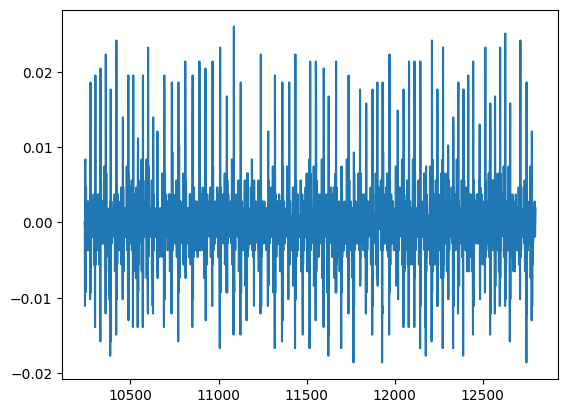

windows 5


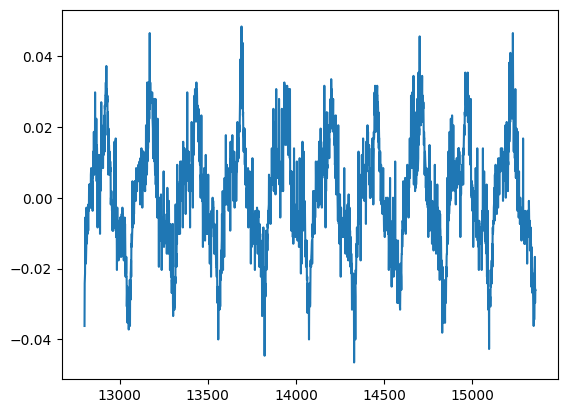

windows 6


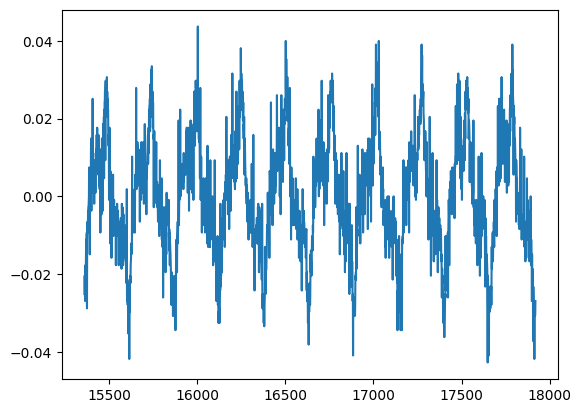

windows 7


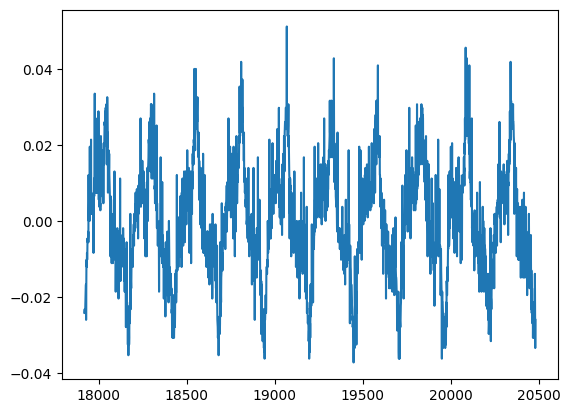

windows 8


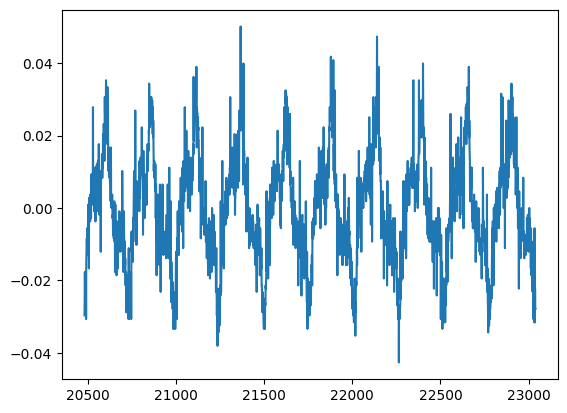

windows 9


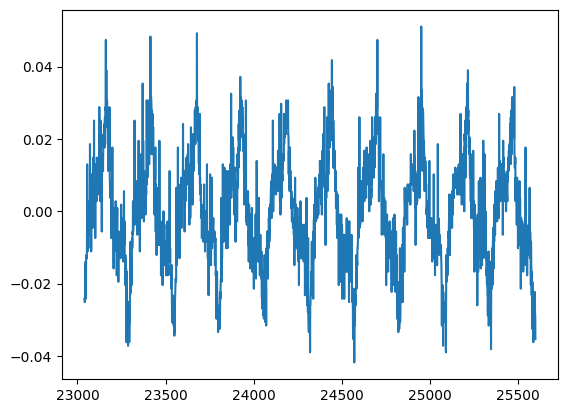

windows 10


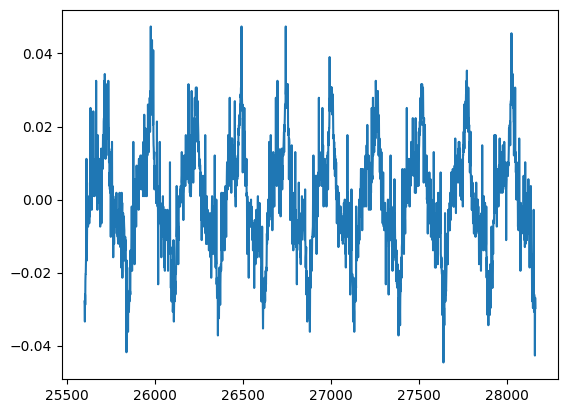

windows 11


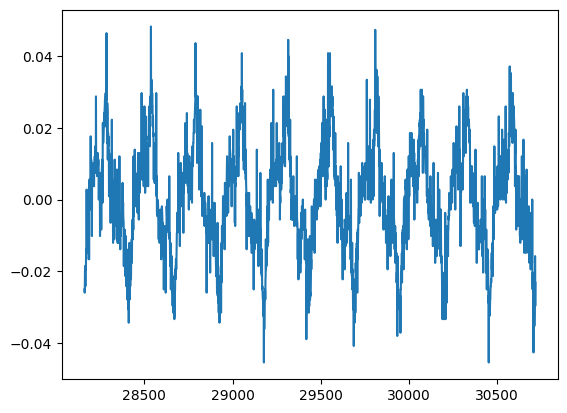

windows 12


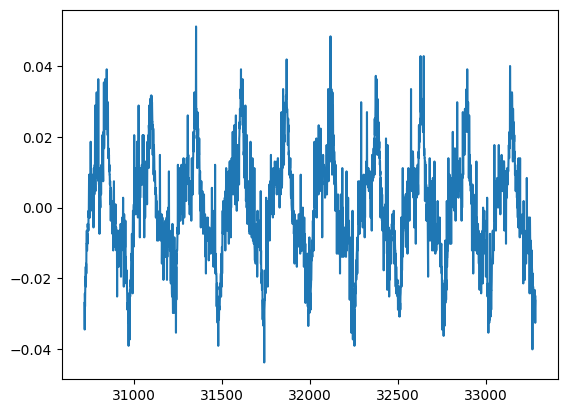

windows 13


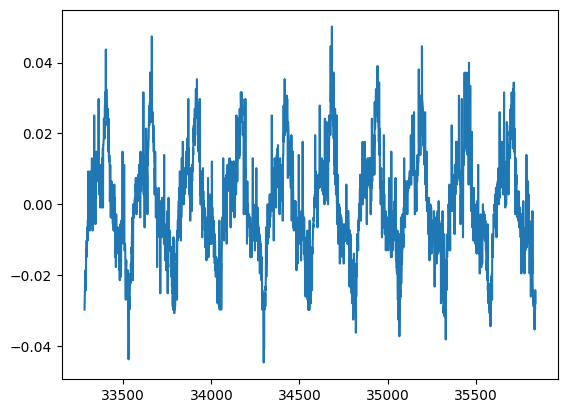

windows 14


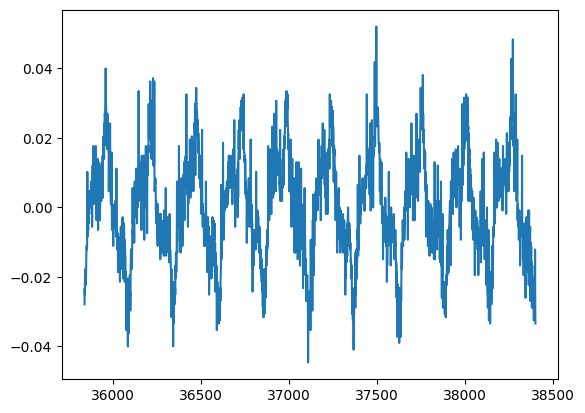

windows 15


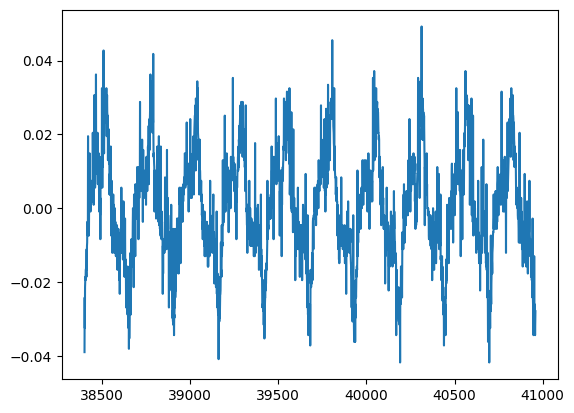

windows 16


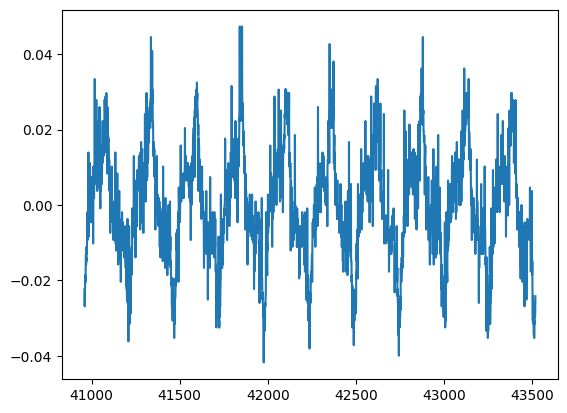

windows 17


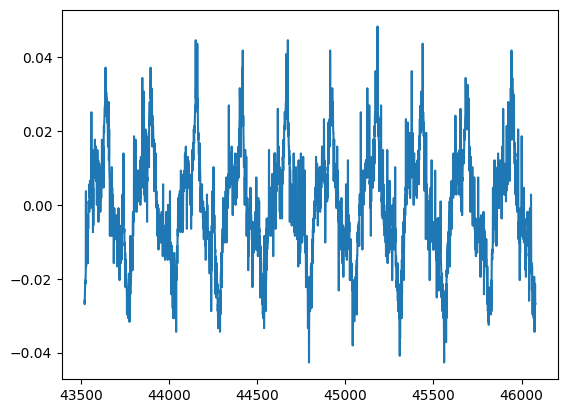

windows 18


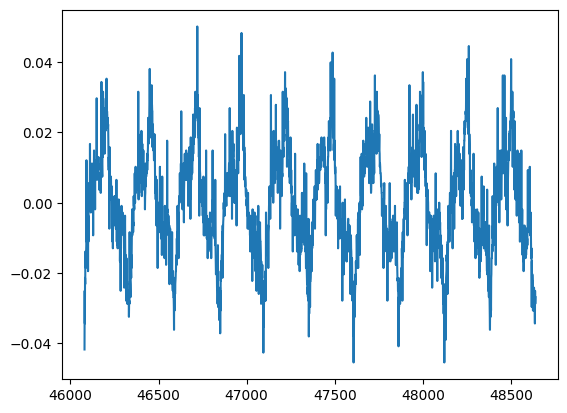

windows 19


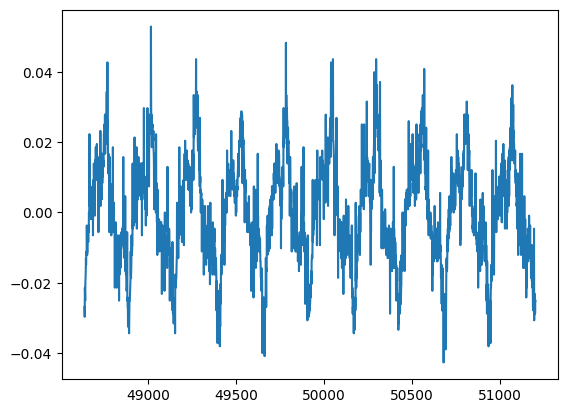

windows 20


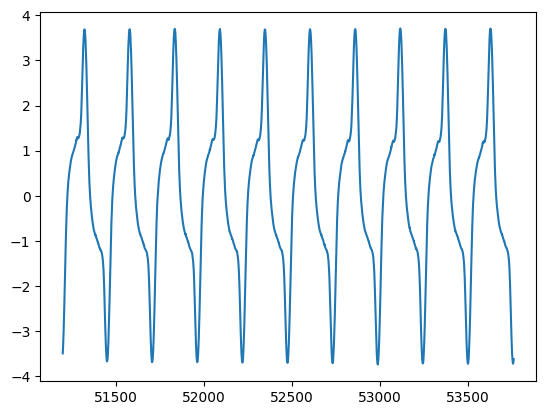

windows 21


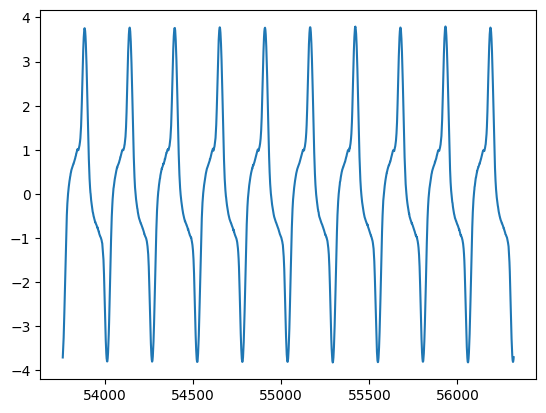

windows 22


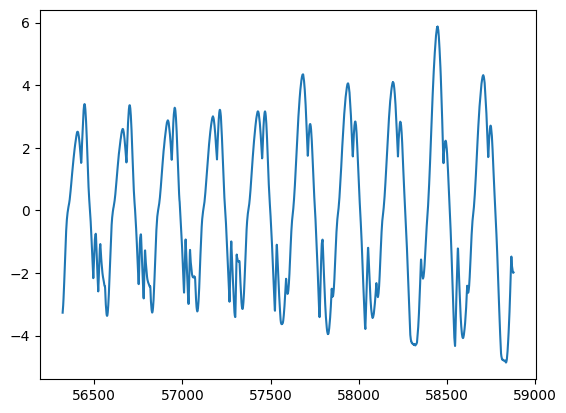

windows 23


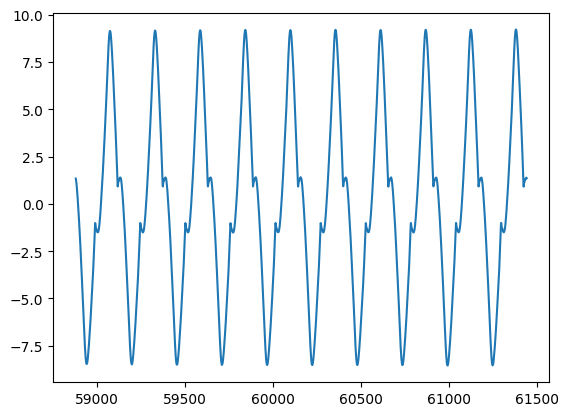

windows 24


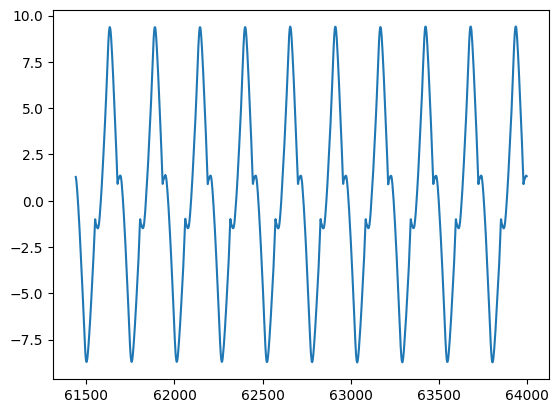

windows 25


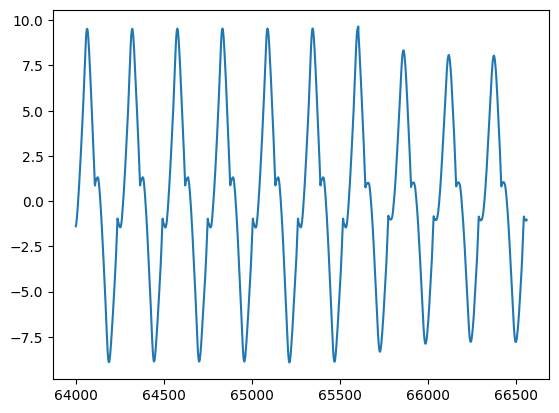

windows 26


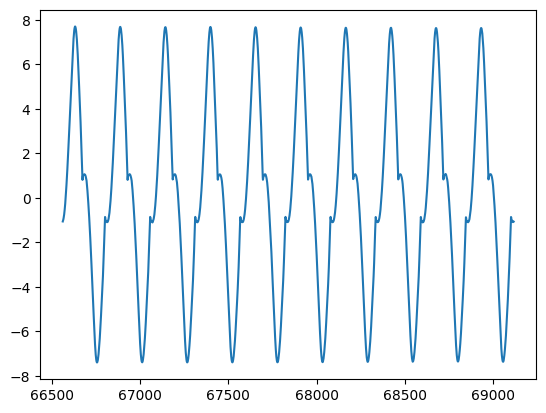

windows 27


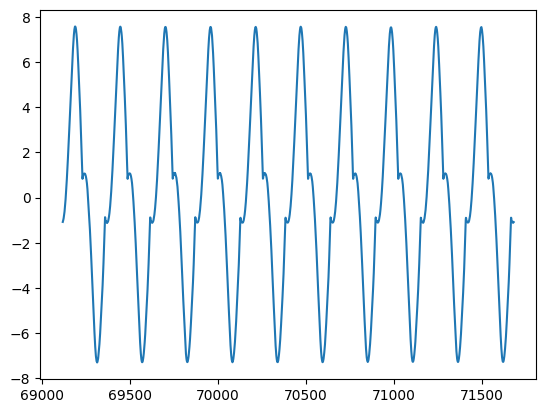

windows 28


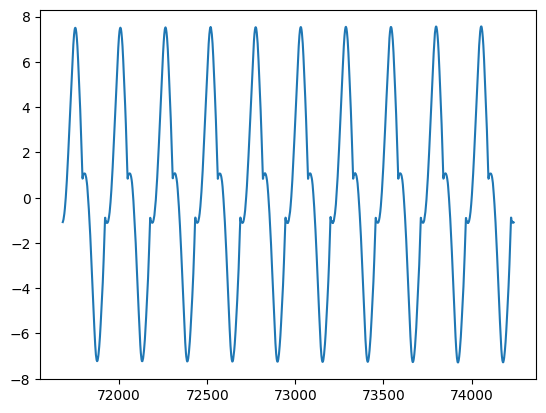

windows 29


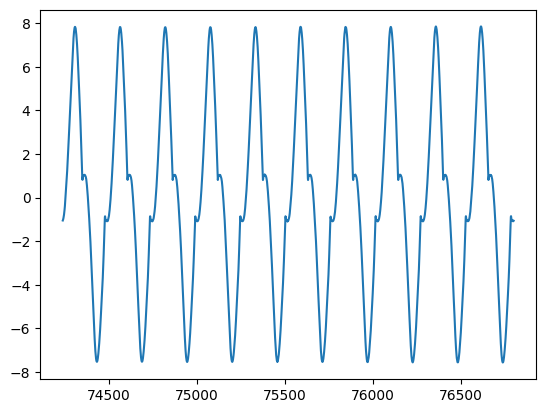

windows 30


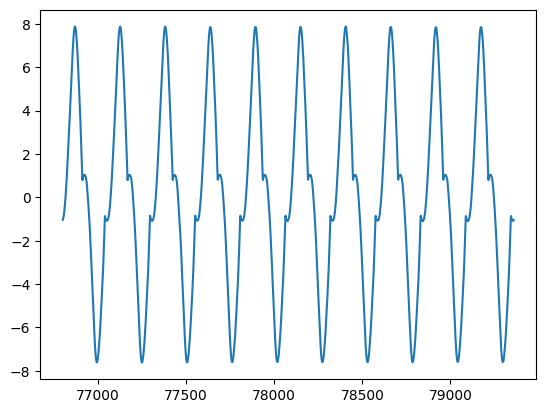

windows 31


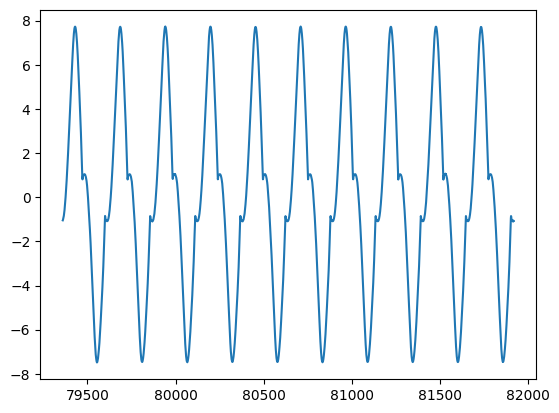

windows 32


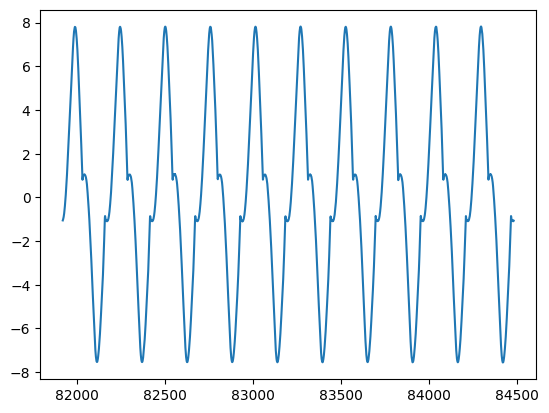

windows 33


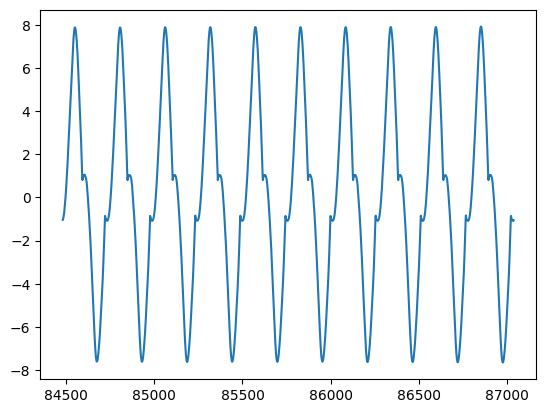

windows 34


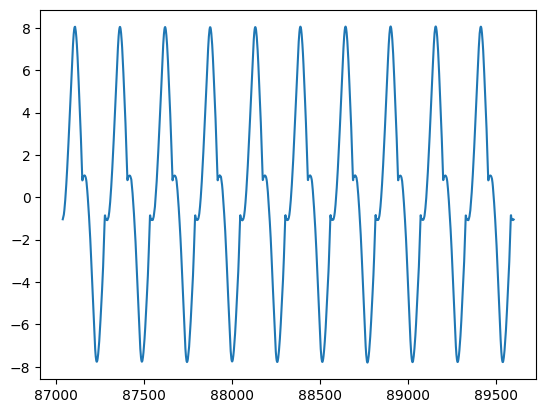

windows 35


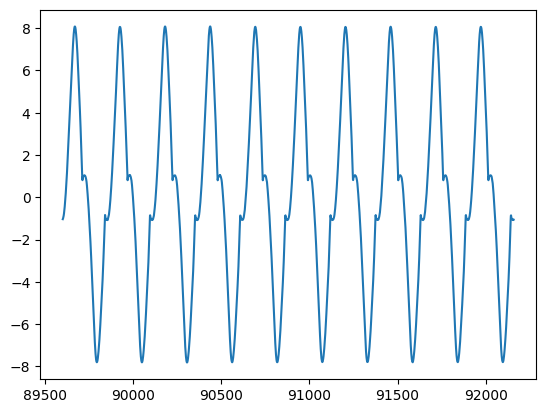

windows 36


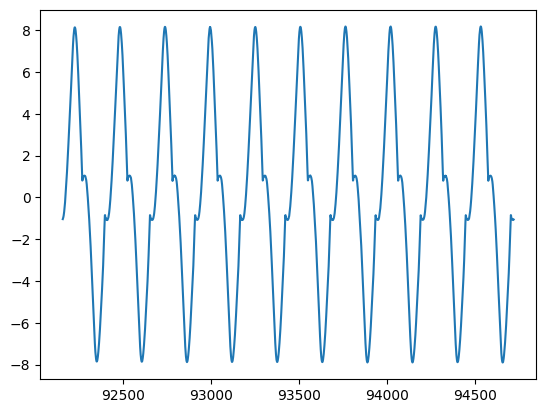

windows 37


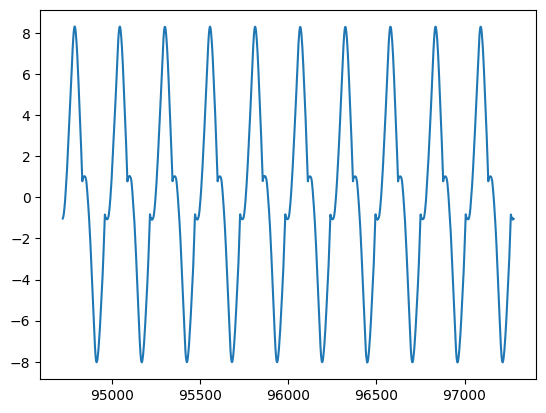

windows 38


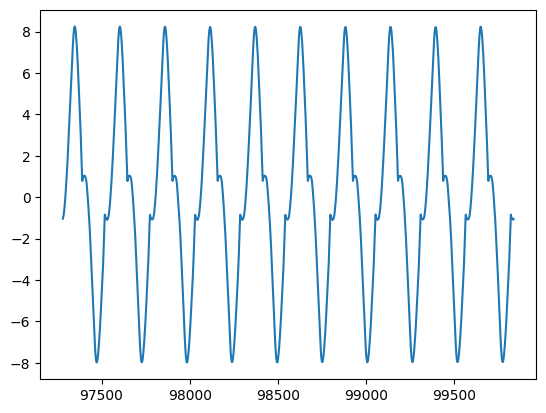

windows 39


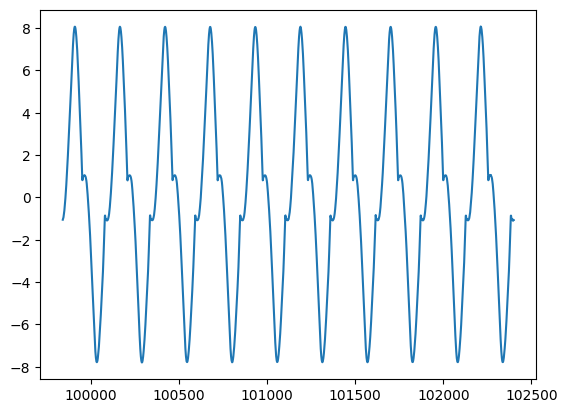

windows 40


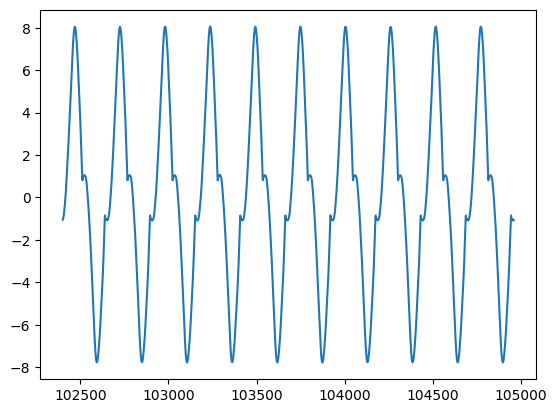

windows 41


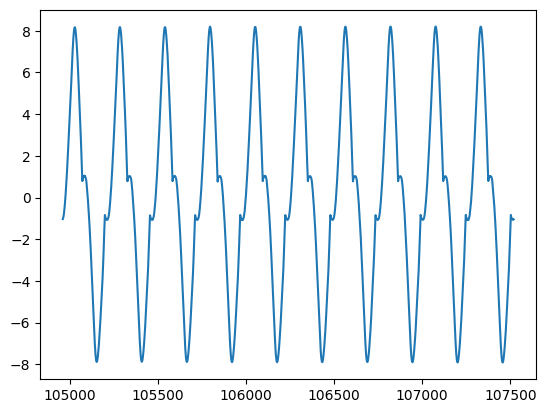

windows 42


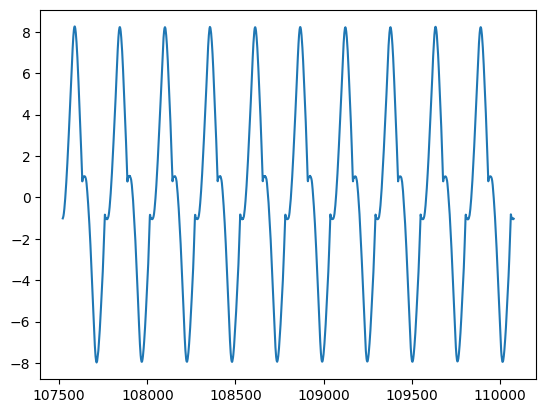

windows 43


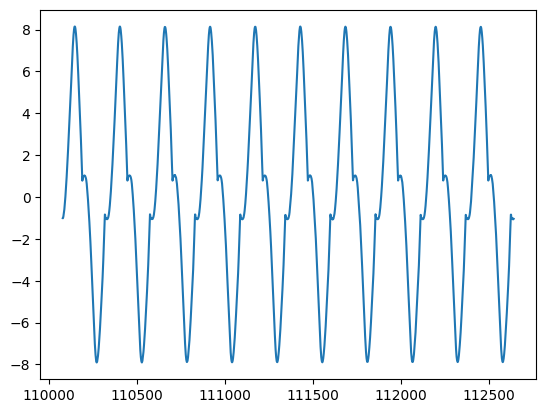

windows 44


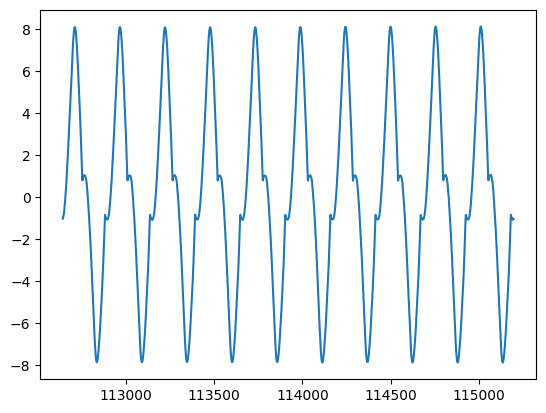

windows 45


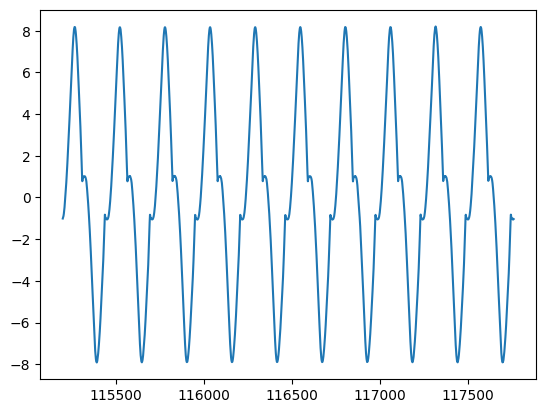

windows 46


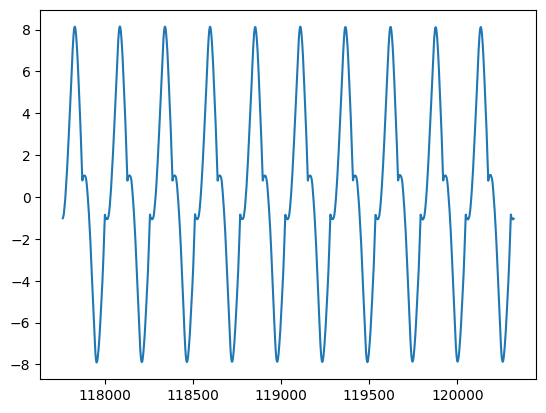

windows 47


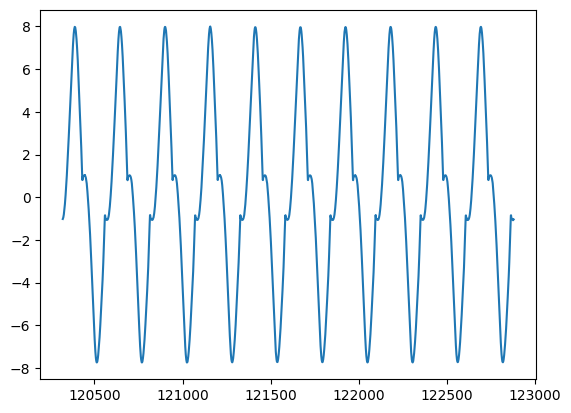

windows 48


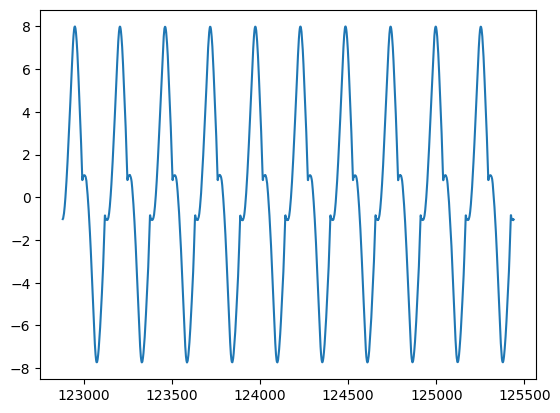

windows 49


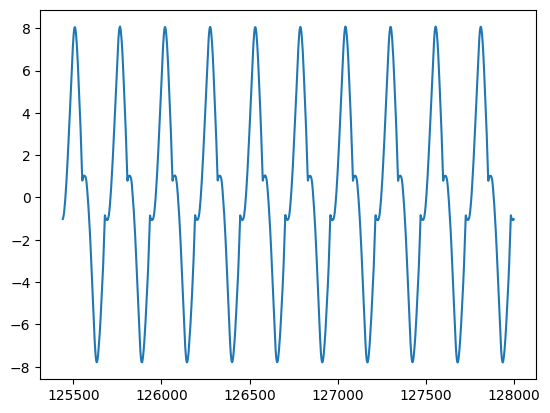

windows 50


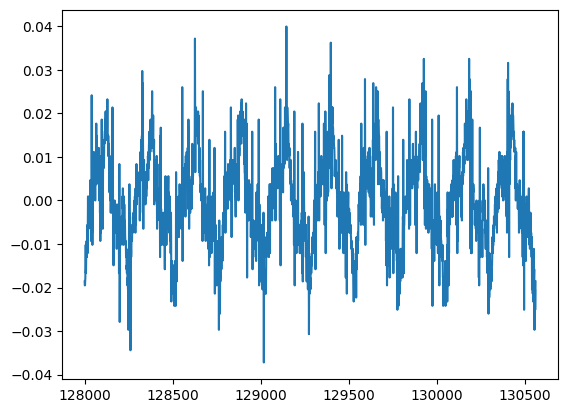

windows 51


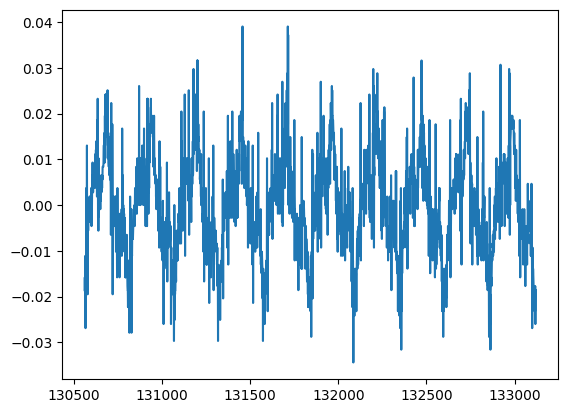

windows 52


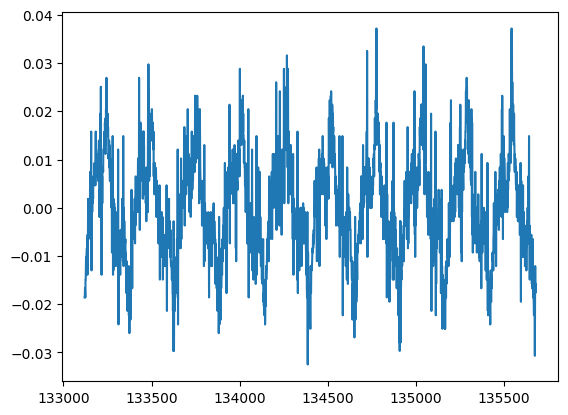

windows 53


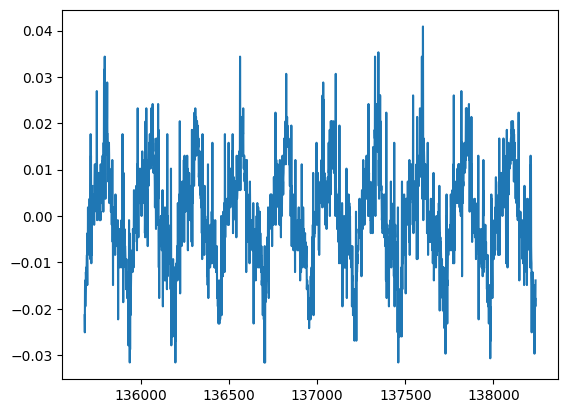

windows 54


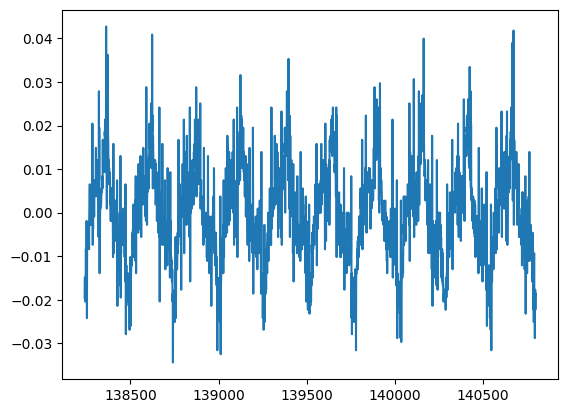

windows 55


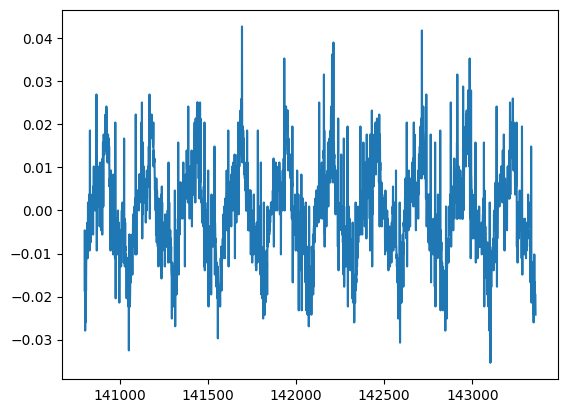

windows 56


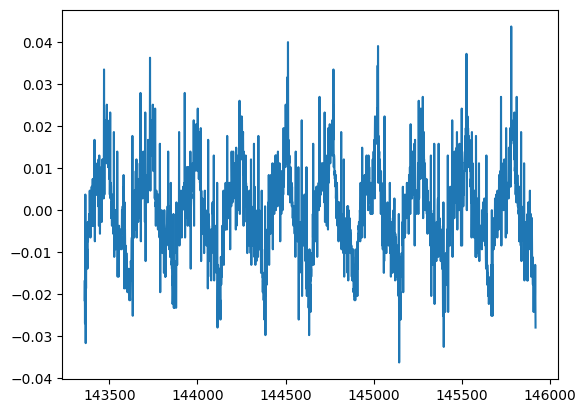

windows 57


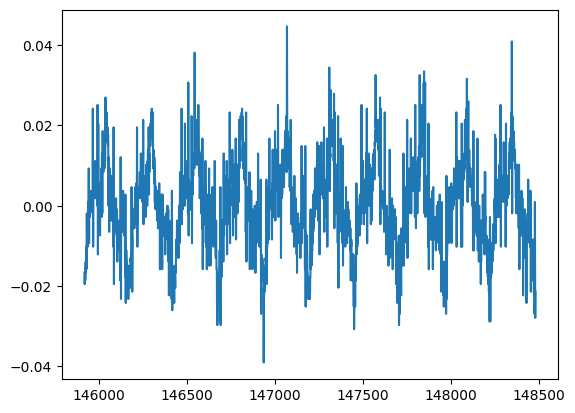

windows 58


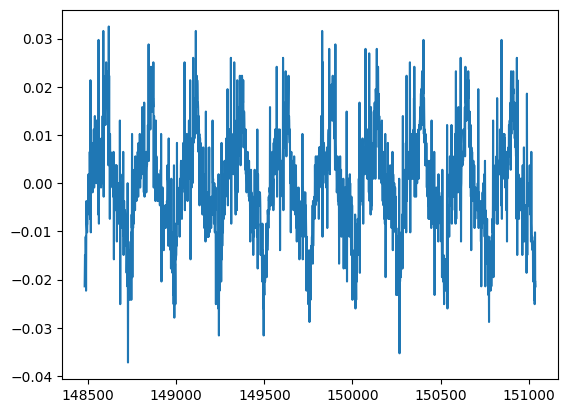

windows 59


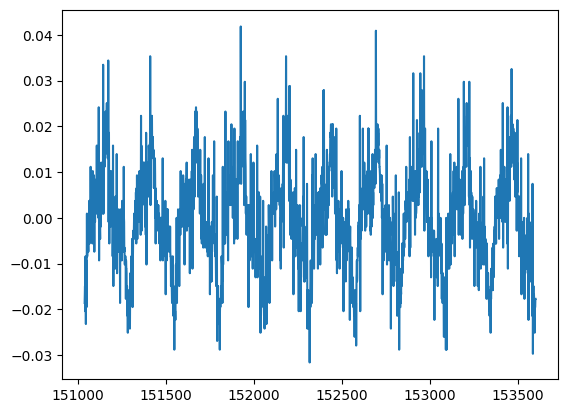

windows 60


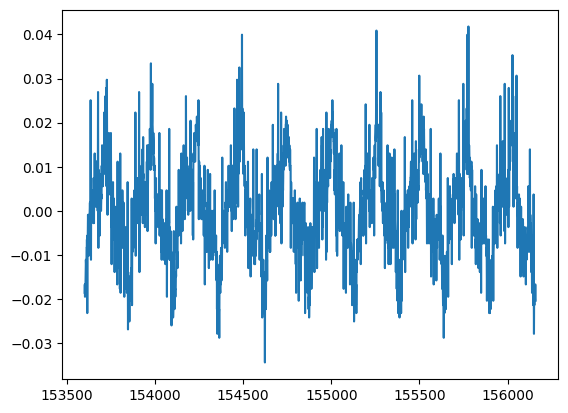

windows 61


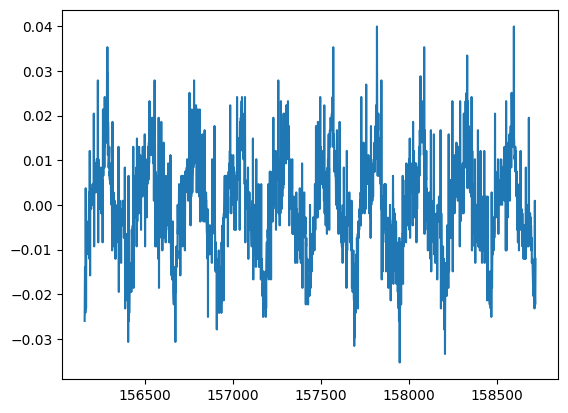

windows 62


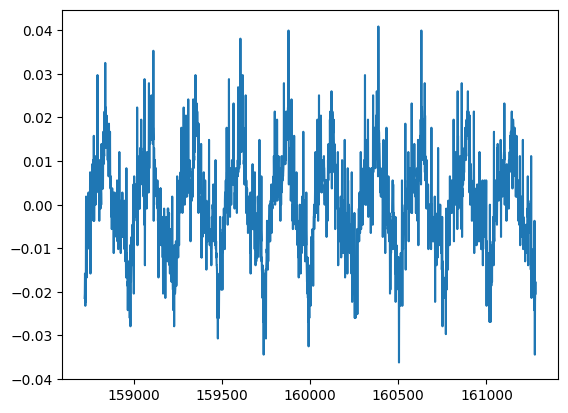

windows 63


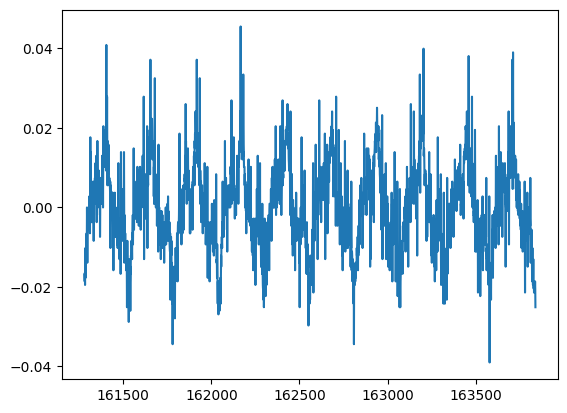

windows 64


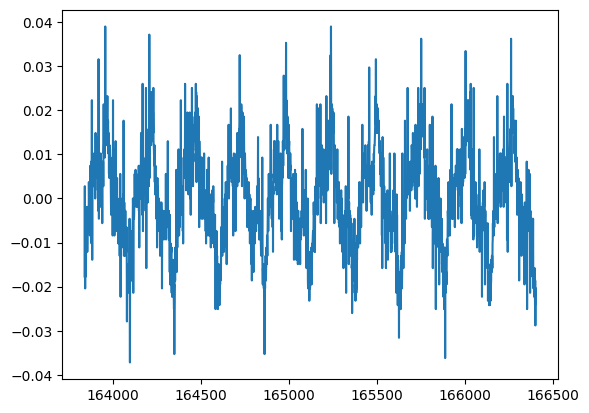

windows 65


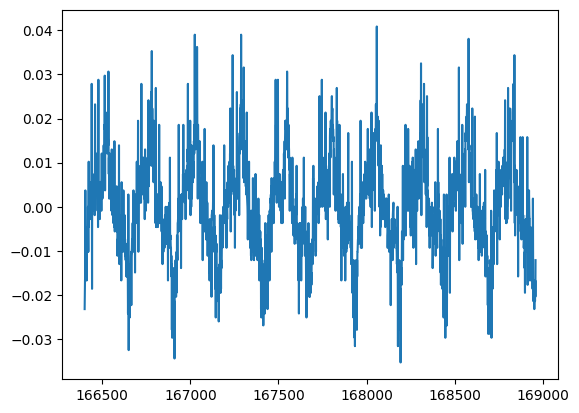

windows 66


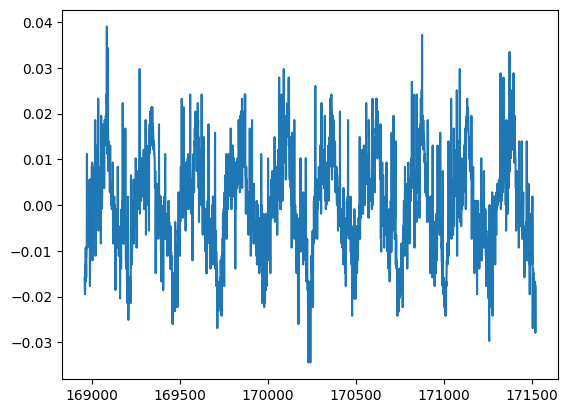

windows 67


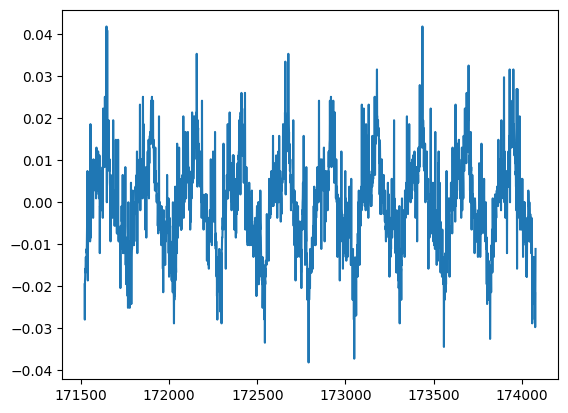

windows 68


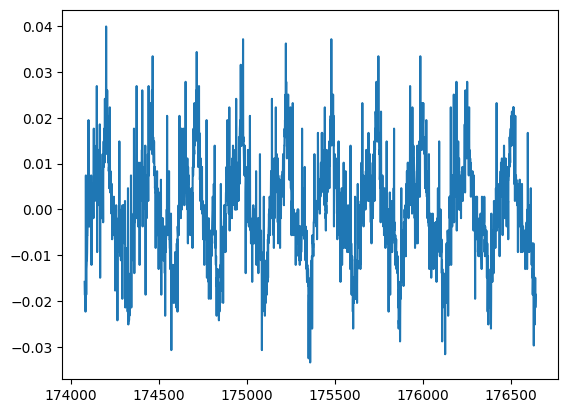

windows 69


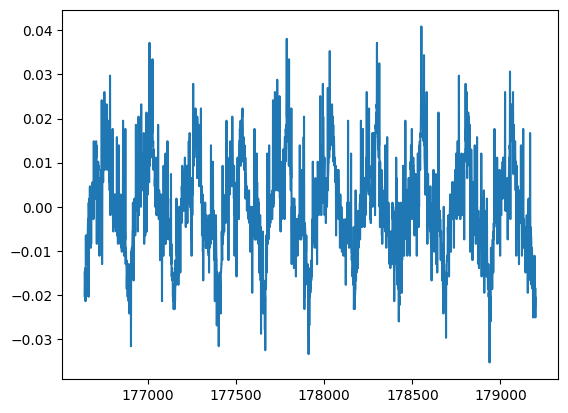

windows 70


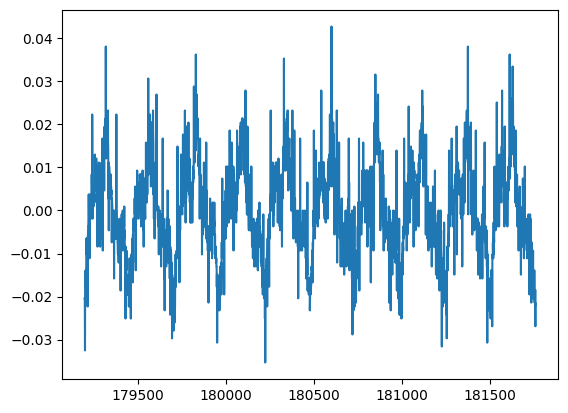

windows 71


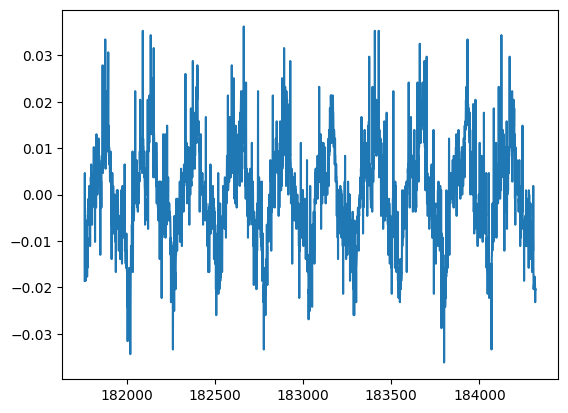

windows 72


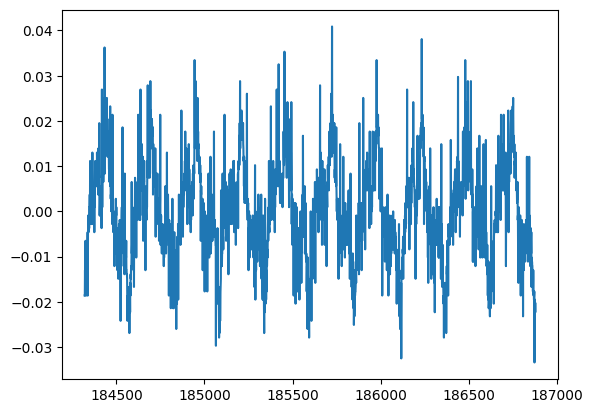

windows 73


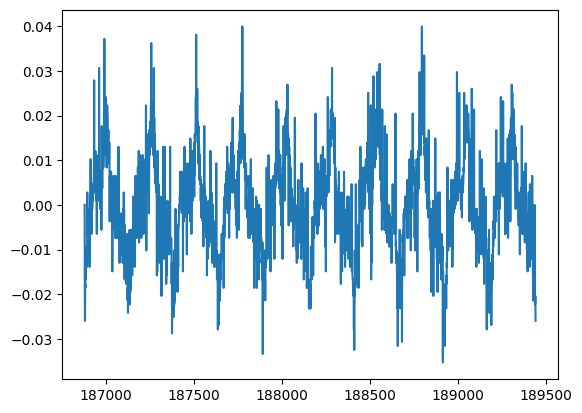

windows 74


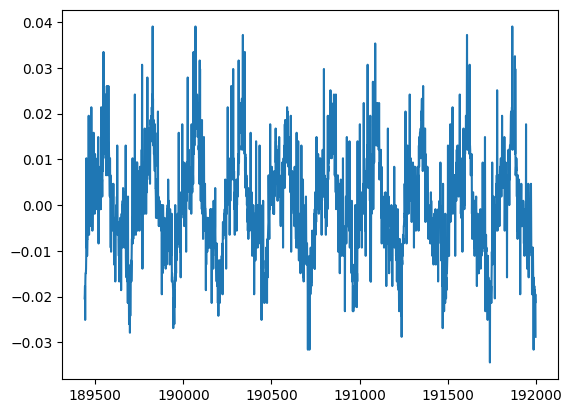

windows 75


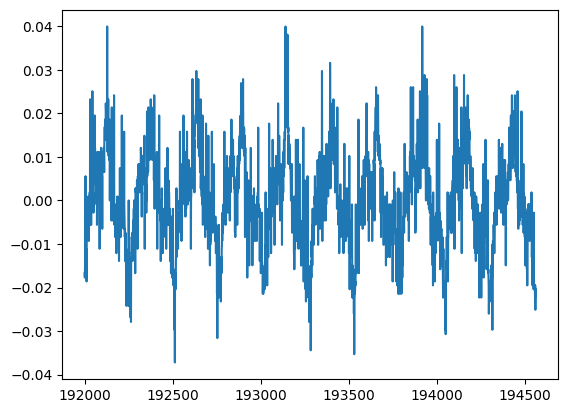

windows 76


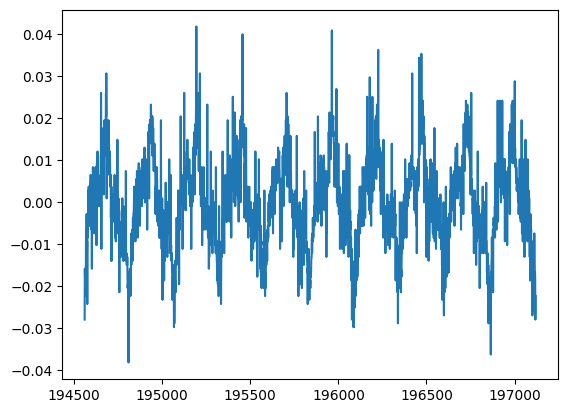

windows 77


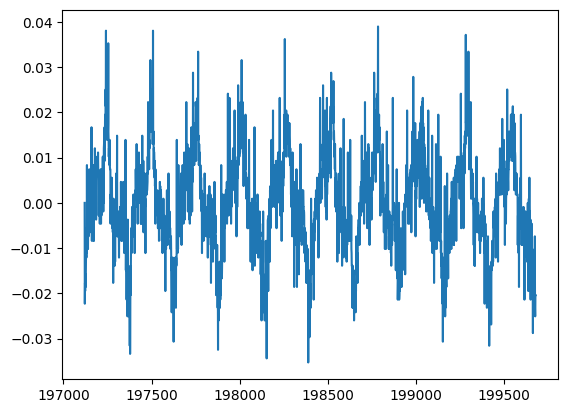

windows 78


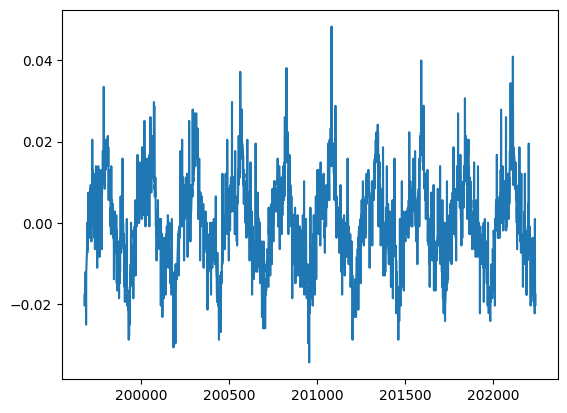

windows 79


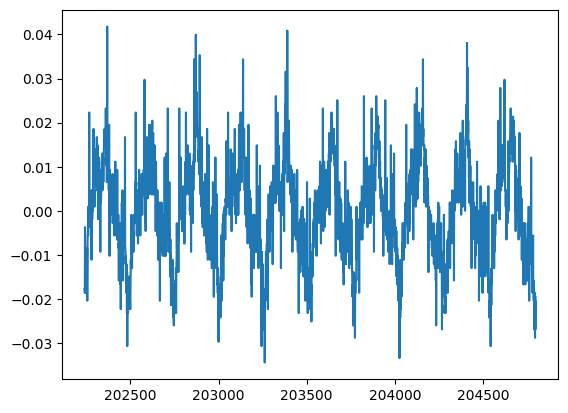

windows 80


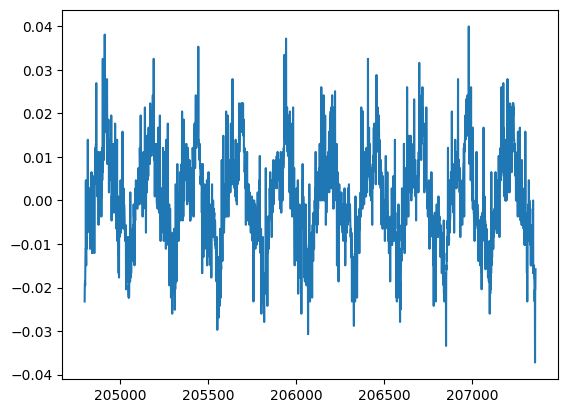

windows 81


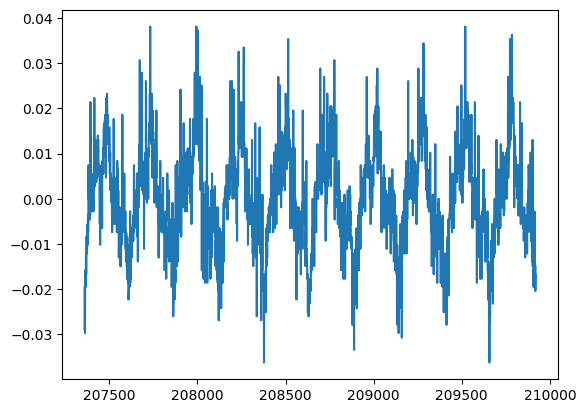

windows 82


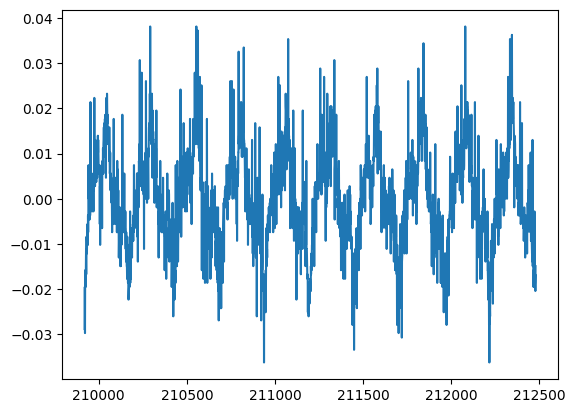

windows 83


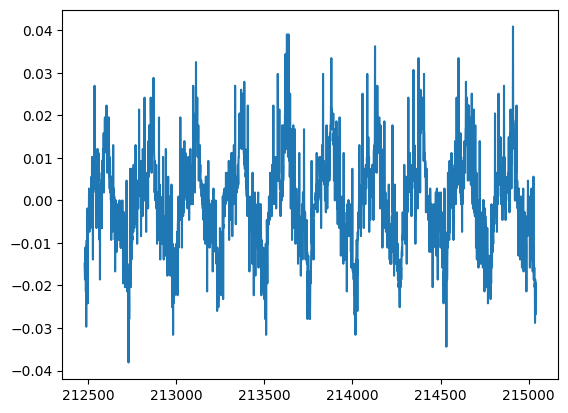

windows 84


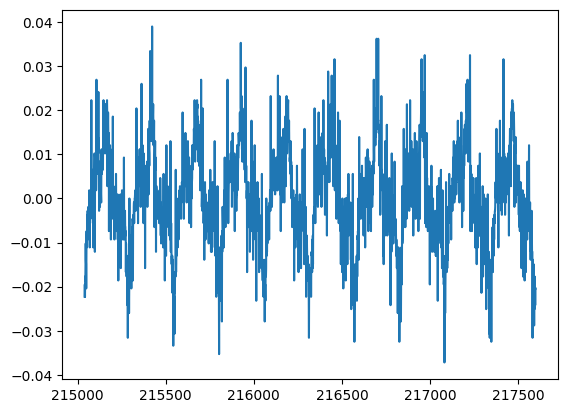

windows 85


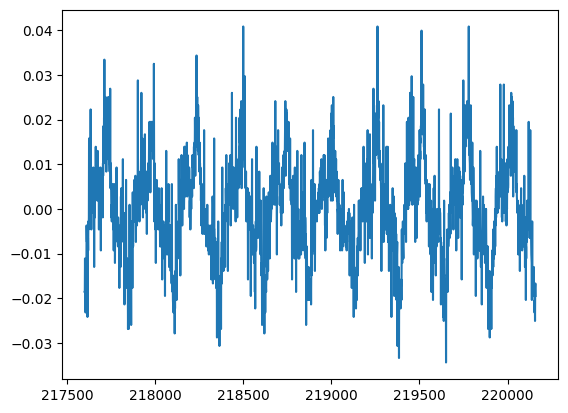

windows 86


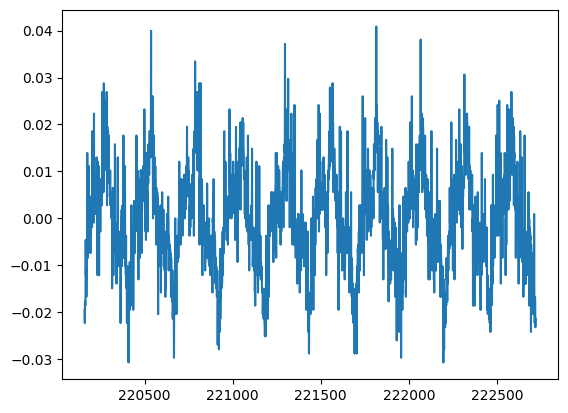

windows 87


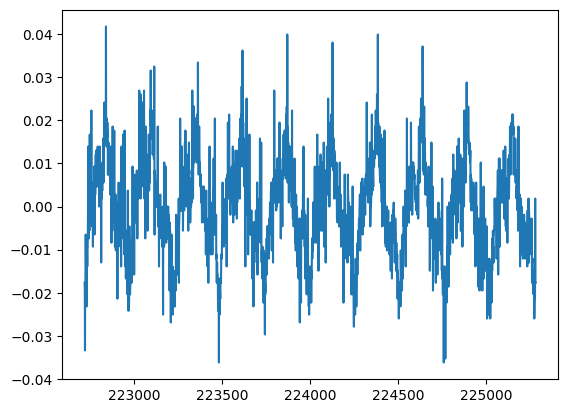

windows 88


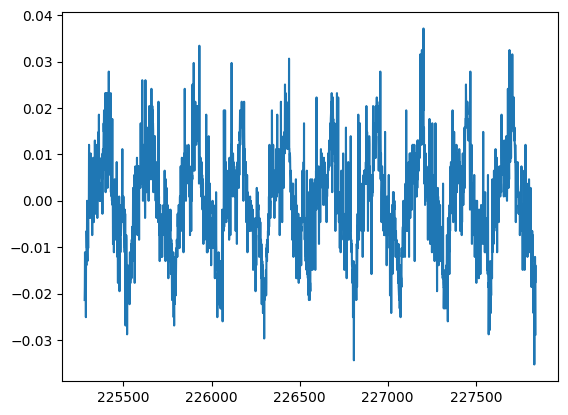

windows 89


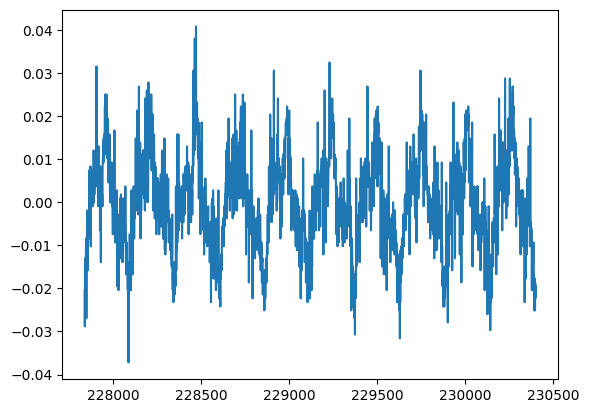

windows 90


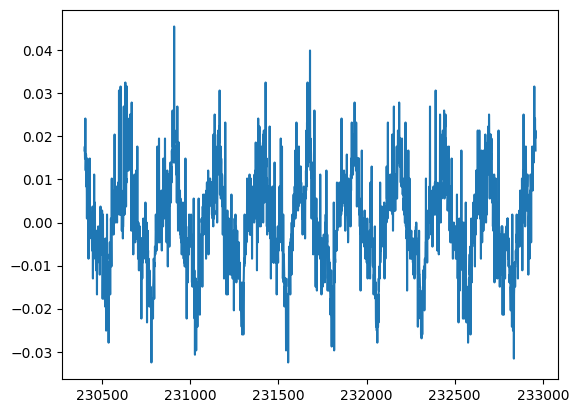

windows 91


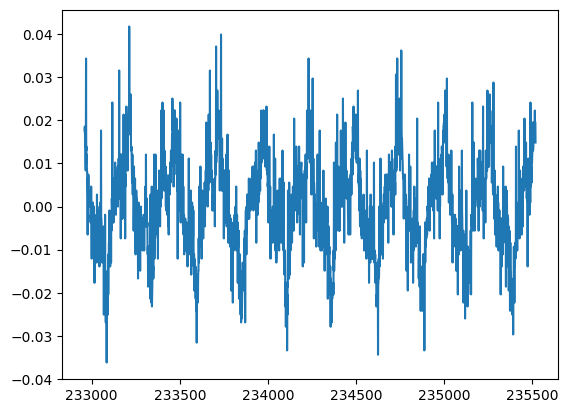

windows 92


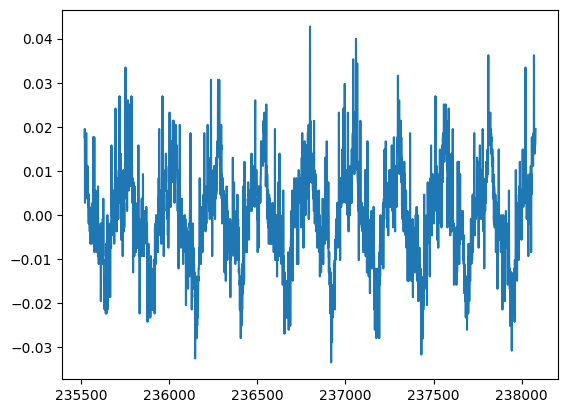

windows 93


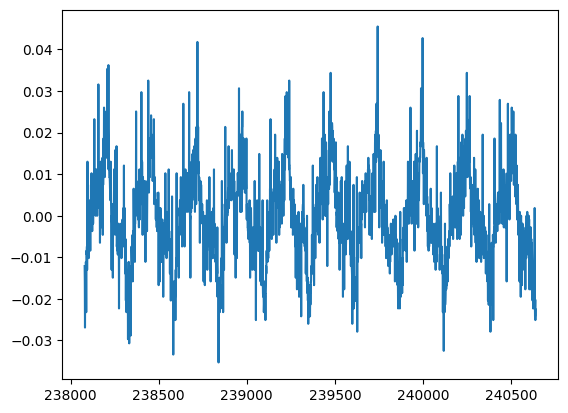

windows 94


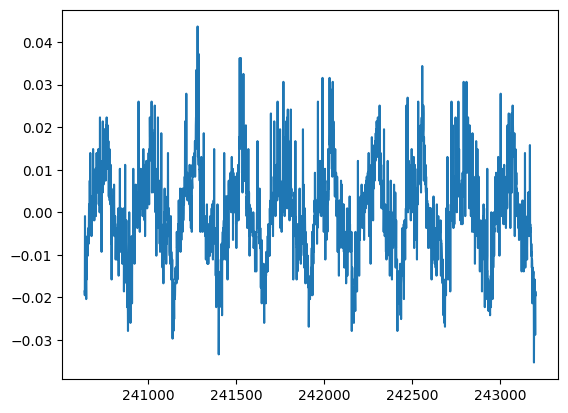

windows 95


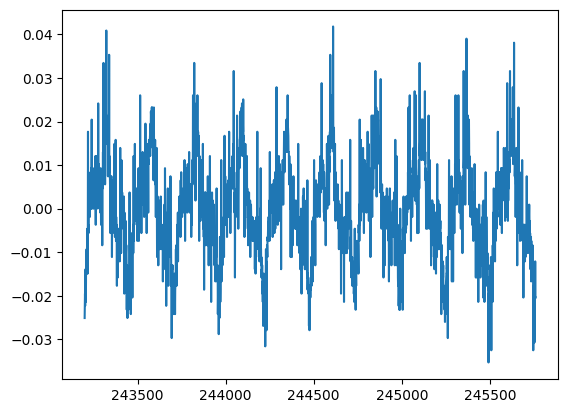

windows 96


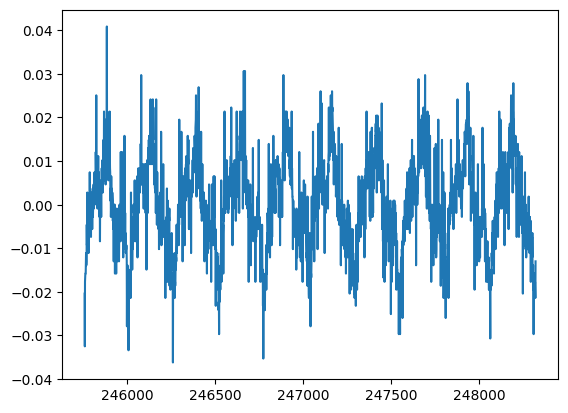

windows 97


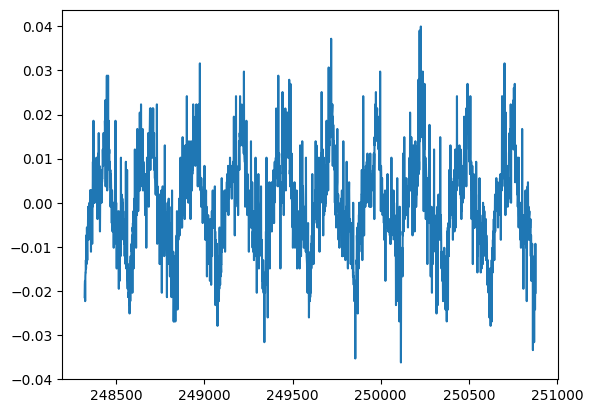

windows 98


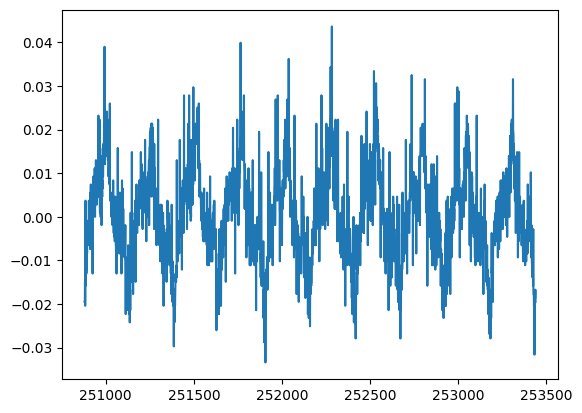

windows 99


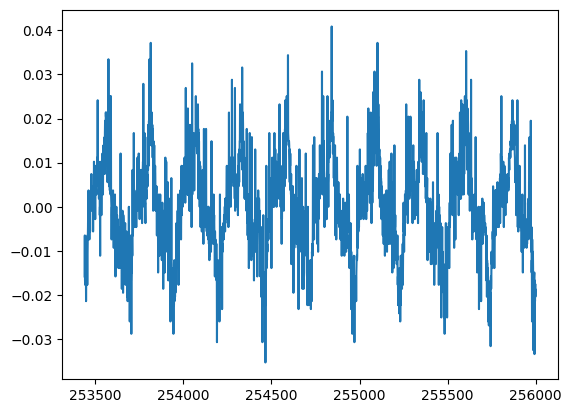

windows 100


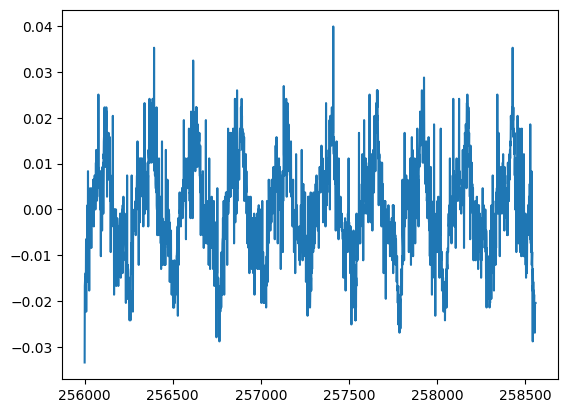

windows 101


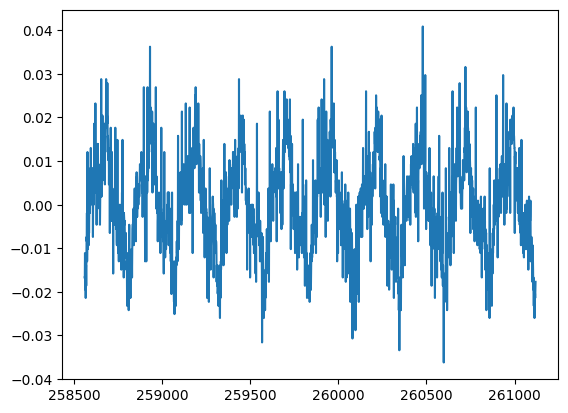

windows 102


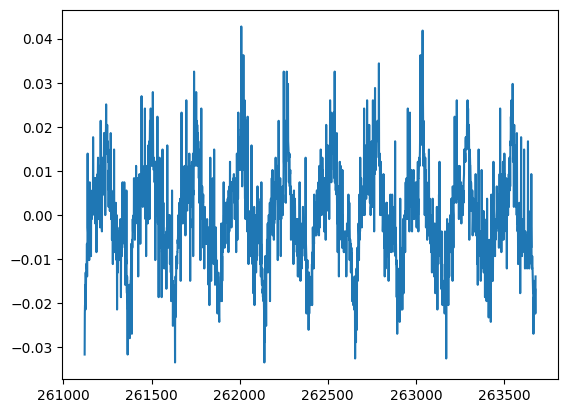

windows 103


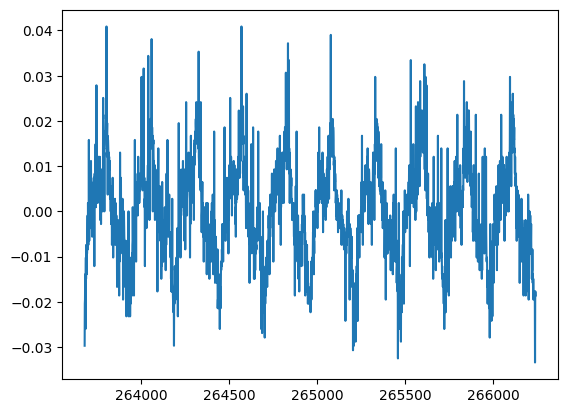

windows 104


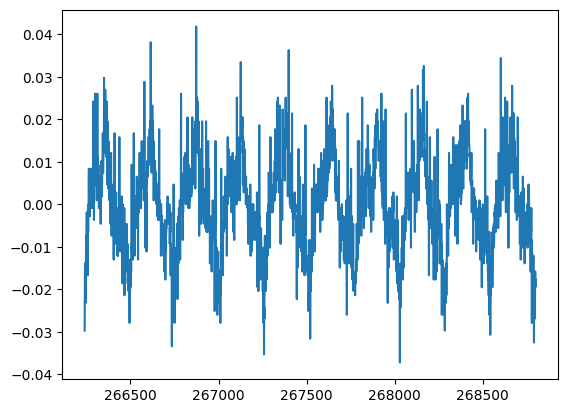

windows 105


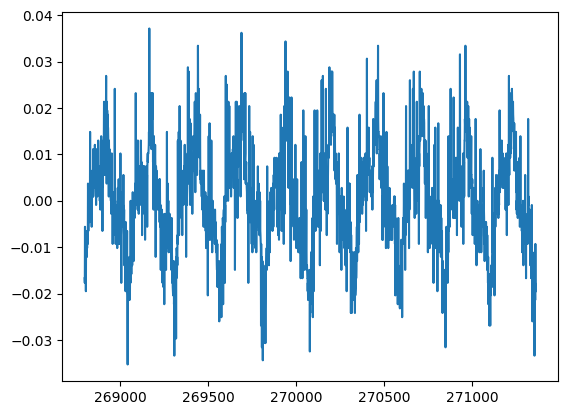

windows 106


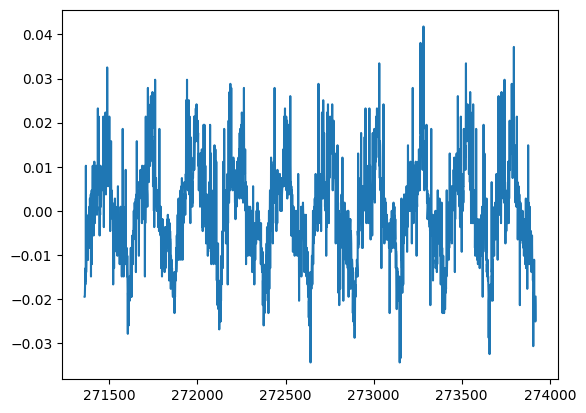

windows 107


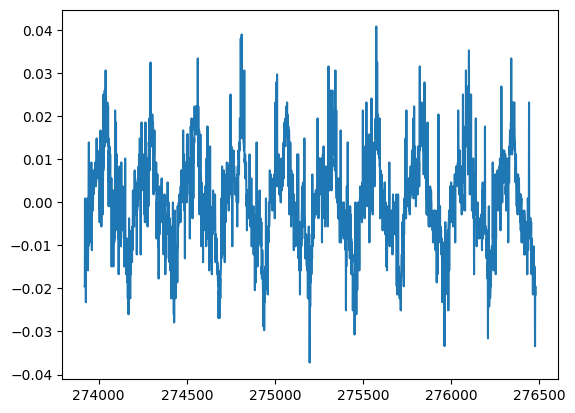

windows 108


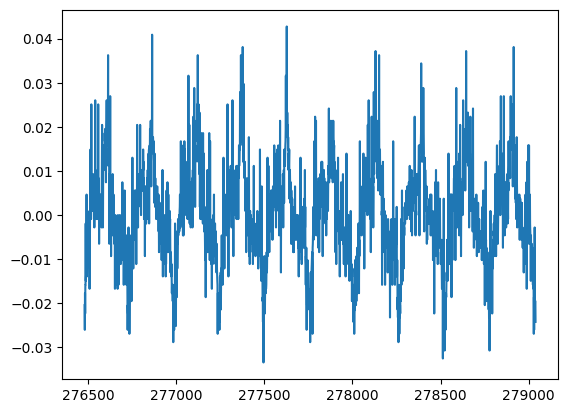

windows 109


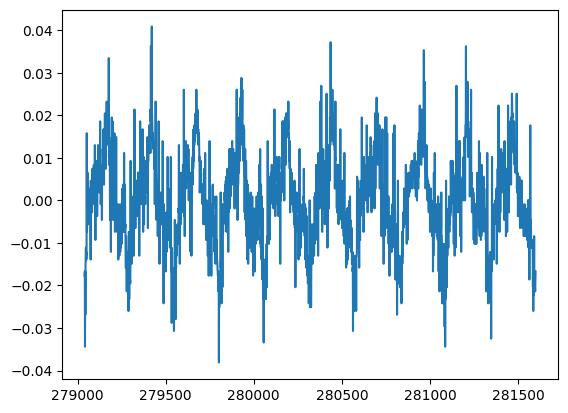

windows 110


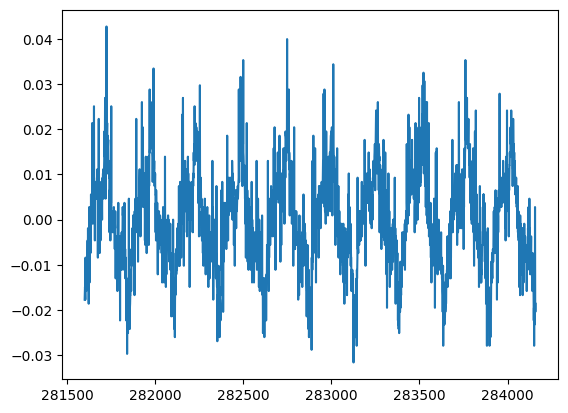

windows 111


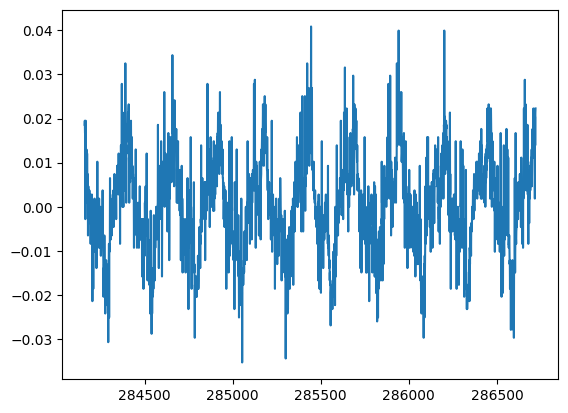

windows 112


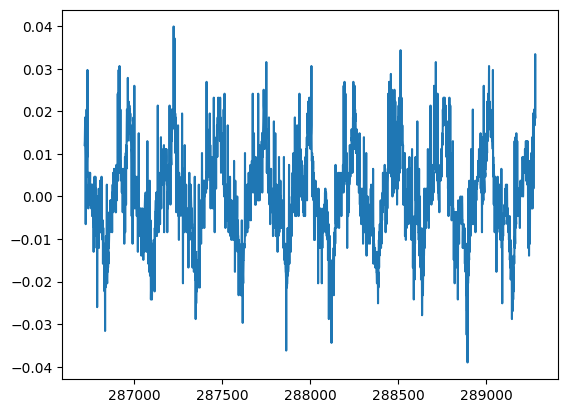

windows 113


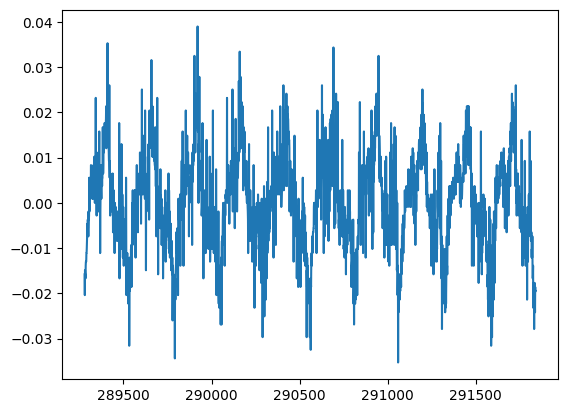

windows 114


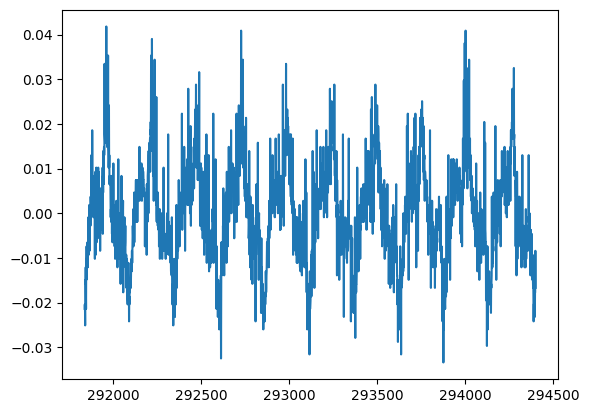

windows 115


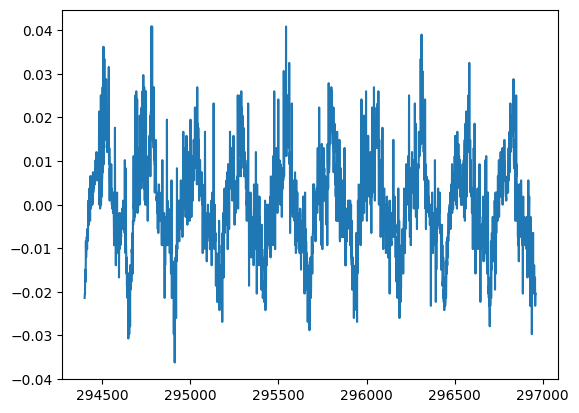

windows 116


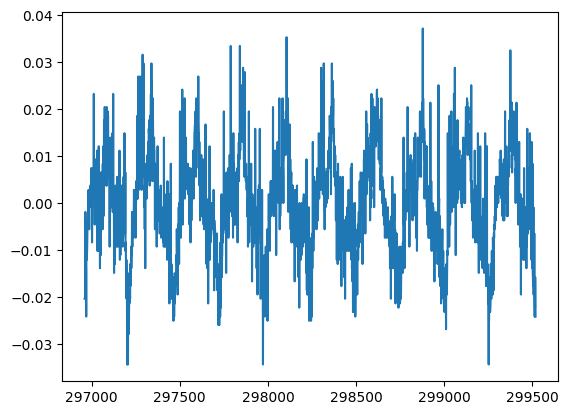

windows 117


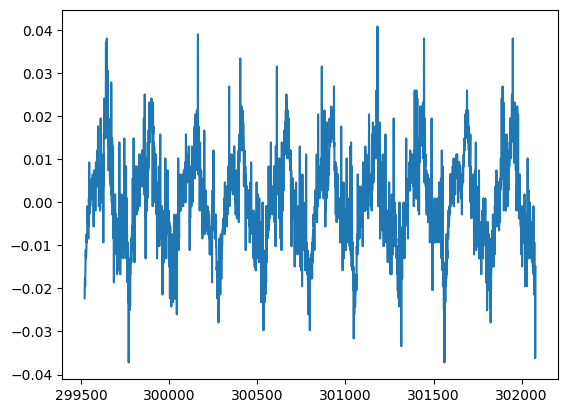

windows 118


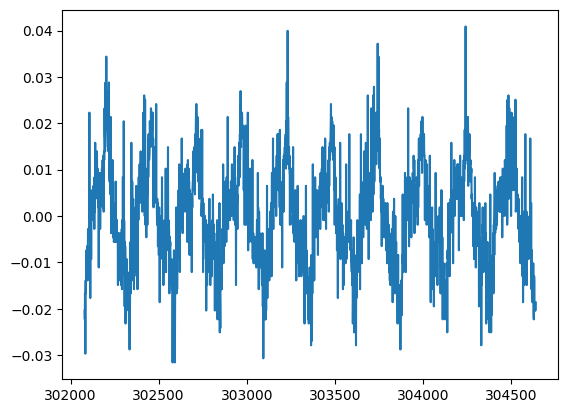

windows 119


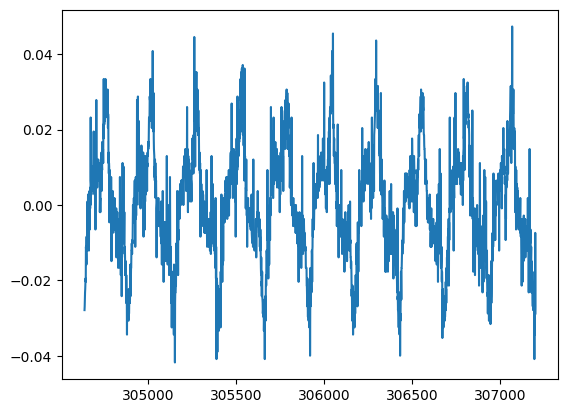

windows 120


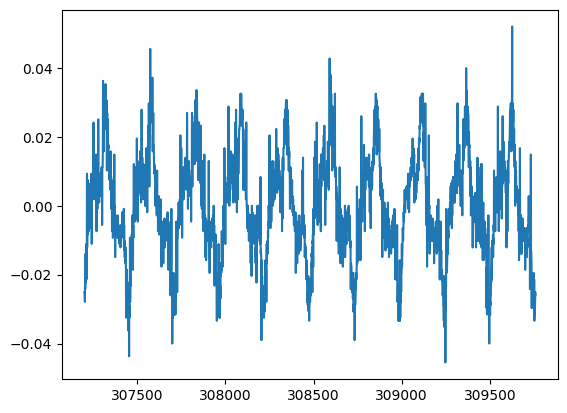

windows 121


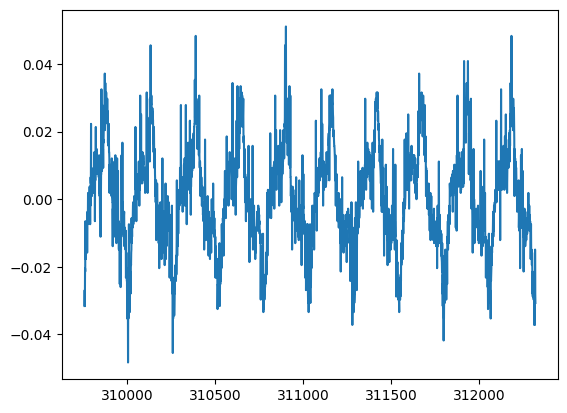

windows 122


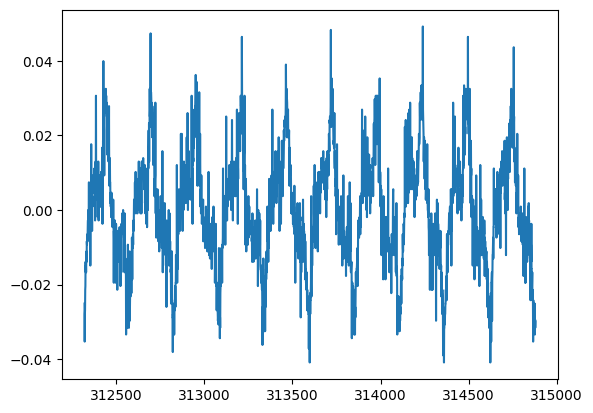

windows 123


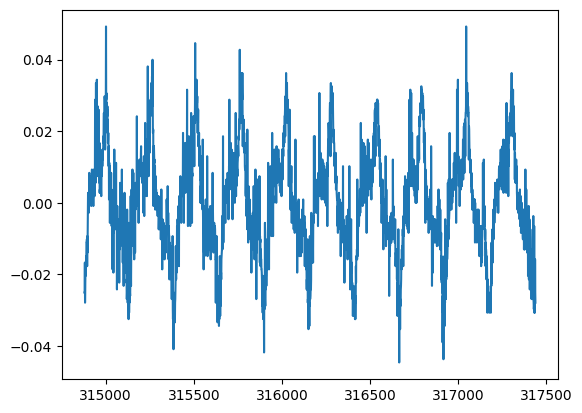

windows 124


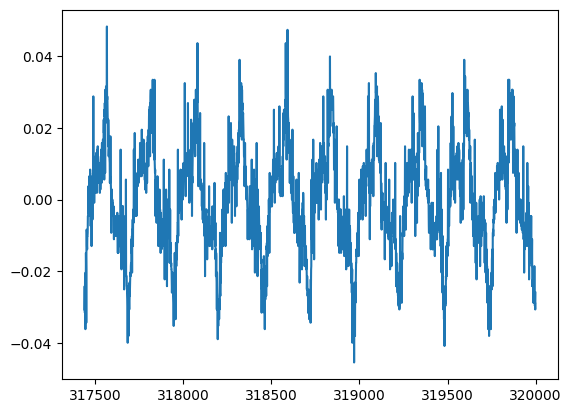

windows 125


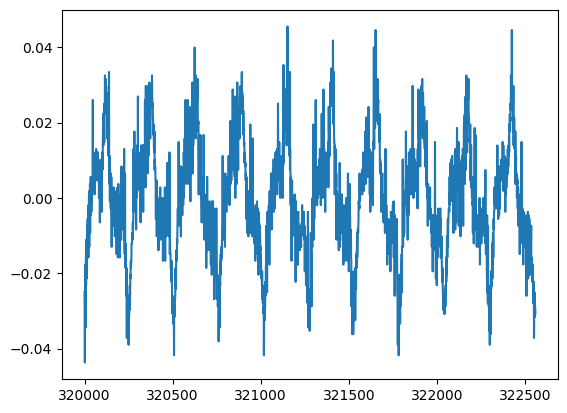

In [19]:
i=0
while i<len(windows):
  plt.plot(windows[i]['BIValor[Amperios]'])
  print('windows',i)
  plt.show()
  i=i+1

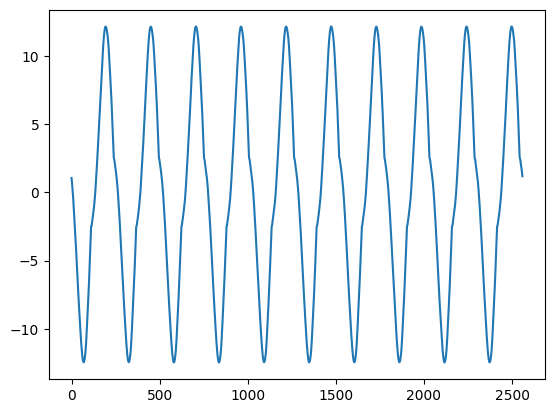

In [20]:
nominal_micro=windows[40]['BIValor[Amperios]']
nominal_tosta=windows[60]['CIValor[Amperios]']
nominal_fridge=windows[20]['DIValor[Amperios]']
agregada=windows[41]['AIValor[Amperios]']

np_list1 = np.array(nominal_micro)*(-1)
np_list2 = np.array(nominal_tosta)
np_list3 = np.array(nominal_fridge)
np_list4=np.array(agregada)


np_sum = np_list1 + np_list2
plt.plot(np_sum)

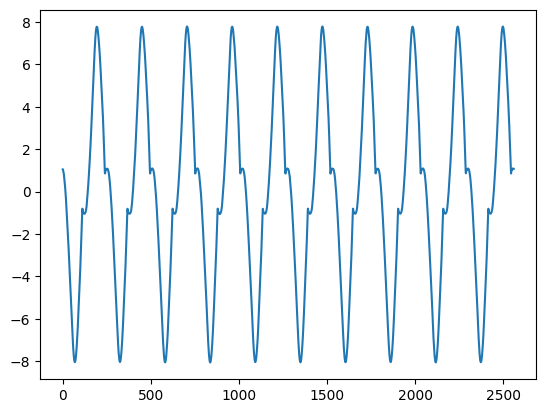

In [21]:
plt.plot(np_list1)
plt.savefig('microwave_new')

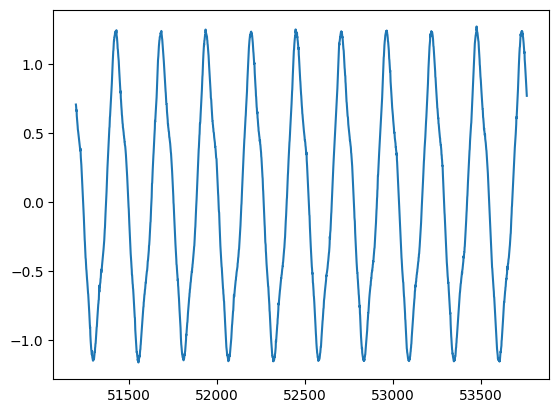

In [22]:
plt.plot(nominal_fridge)

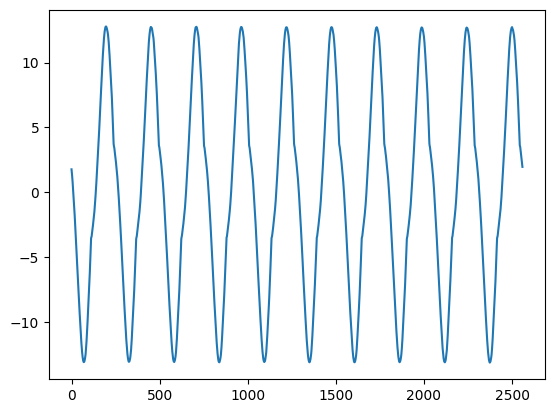

In [23]:
np_sum1=np_list1 + np_list2+np_list3
plt.plot(np_sum1)

In [24]:
np_sum2=np_sum1*(-1)

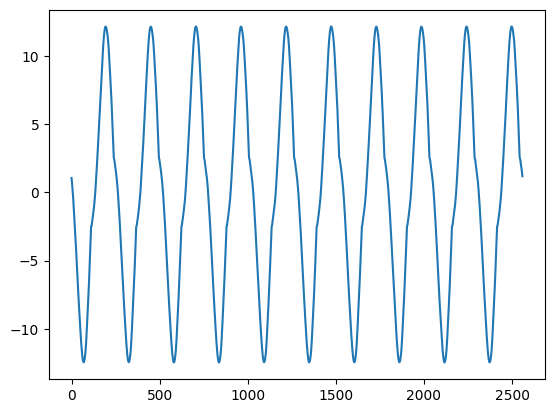

In [25]:
nominal_micro=windows[40]['BIValor[Amperios]']
nominal_tosta=windows[60]['CIValor[Amperios]']
nominal_fridge=windows[20]['DIValor[Amperios]']
agregada=windows[41]['AIValor[Amperios]']

np_list1 = np.array(nominal_micro)*(-1)
np_list2 = np.array(nominal_tosta)
np_list3 = np.array(nominal_fridge)
np_list4=np.array(agregada)


np_sum = np_list1 + np_list2
plt.plot(np_sum)

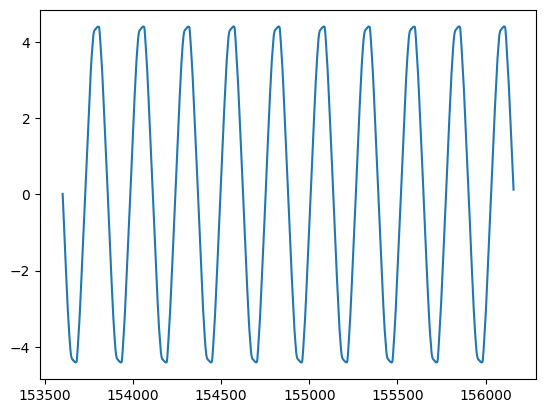

In [27]:
plt.plot(nominal_tosta)

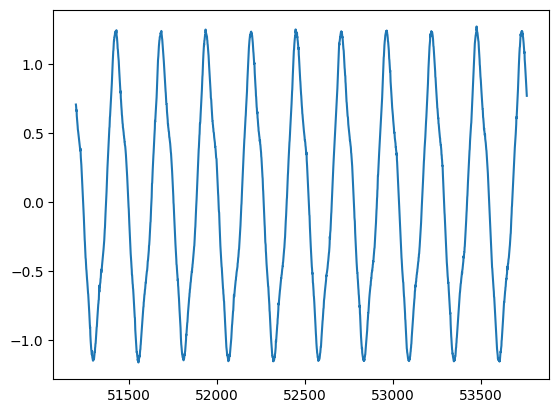

In [28]:
plt.plot(nominal_fridge)

In [29]:
len(np_sum)

2560

In [30]:
# construct a time signal
Fs= 8000 #sampling signal
tstep=1 / Fs #sample time interval
f0=50 #signal freq

N= int(10*Fs/f0)


t=np.linspace(0, (N-1)*tstep, N)
fstep= Fs/N
f=np.linspace(0, (N-1)*fstep, N)

y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)

In [31]:
#H_AA

fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_AA=[]

i=0
while i<len(windows):





#while i<len(windows)/2:
  pf1=windows[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= np_sum

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal
   #Fs=6450
  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_AA.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))




#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1

In [32]:
k=10  #hiperparámetro de cantidad de armónicos.
t=0 #hiperparámetro de la ventana de referencia de la agregada

In [33]:
#H_A

fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_A=[]

i=0
while i<len(windows):





#while i<len(windows)/2:
  pf1=windows[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['AIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_A.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))




#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1


In [34]:
#H_B

fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_B=[]

i=0
while i<len(windows):





#while i<len(windows)/2:
  pf1=windows[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['BIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_B.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))





#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1

In [35]:
#H_C
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_C=[]

i=0
while i<len(windows):





#while i<len(windows)/2:
  pf1=windows[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['CIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_C.append(H_A_30)
#plot
  #plt.figure(figsize = (12, 6))




  #plt.subplot(121)

  #plt.plot(y)

  #plt.subplot(122)
  #plt.plot(f_plot, X_mag_plot)


  #plt.show()

  i=i+1

In [36]:
#H_D
fundamental=[]
third_harmonic_windows_chanel_A=[]
I_residuales_por_windows=[]
fifth_harmonic_windows_chanel_A=[]
X_mag_plot_lista_A=[]
all_complex_A=[]
H_D=[]

i=0
while i<len(windows):





#while i<len(windows)/2:
  pf1=windows[i]

  #if i==85 or i==86 or i==87 or i==106 or i==107:
  y= pf1['DIValor[Amperios]']

  #else:
   # y= pf1['AIValor[Amperios]']

  #y=list(pf1['AIValor[Amperios]'])


  from numpy.fft import fft, ifft

 # construct a time signal

  Fs= 6450 #sampling signal
  tstep=1 / Fs #sample time interval
  f0=50 #signal freq

  N= int(10*Fs/f0)

  t=np.linspace(0, (N-1)*tstep, N)
  fstep= Fs/N


  #y=1*np.sin(2*np.pi*f0*t) + 3*np.sin(3*np.pi*f0*t)




  X=np.fft.fft(y)
  #all_complex_A.append(X)
  X_mag=np.abs(X)/N
  all_complex_A.append(X_mag)


  f_plot=f[0:int(N/2+1)]
  X_mag_plot=X_mag[0:int(N/2+1)]
  X_mag_plot[0]=X_mag_plot[0]/2 #note:dc component does not need multiply for 2.

  X_mag_plot_lista_A.append(X_mag_plot)

  third_harmonic_windows_chanel_A.append(X_mag_plot[30])
  fifth_harmonic_windows_chanel_A.append(X_mag_plot[50])
  fundamental.append(X_mag_plot[10])
  H_A_30=[X_mag_plot[10],X_mag_plot[20],X_mag_plot[30],X_mag_plot[40],X_mag_plot[50],X_mag_plot[60],X_mag_plot[70],X_mag_plot[80],X_mag_plot[90],X_mag_plot[100],X_mag_plot[110],X_mag_plot[120],X_mag_plot[130],X_mag_plot[140],X_mag_plot[150],X_mag_plot[160],X_mag_plot[170],X_mag_plot[180],X_mag_plot[190],X_mag_plot[200],X_mag_plot[210],X_mag_plot[220],X_mag_plot[230],X_mag_plot[240],X_mag_plot[250],X_mag_plot[260],X_mag_plot[270],X_mag_plot[280],X_mag_plot[290],X_mag_plot[300] ]
  H_D.append(H_A_30)
#plot
#  plt.figure(figsize = (12, 6))





#  plt.subplot(121)

#  plt.plot(y)

#  plt.subplot(122)
#  plt.plot(f_plot, X_mag_plot)


#  plt.show()

  i=i+1

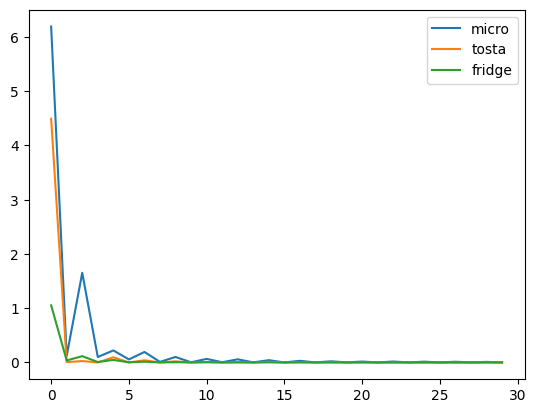

In [37]:
plt.plot(H_B[40], label='micro')
plt.plot(H_C[60], label='tosta')
plt.plot(H_D[20], label='fridge')

plt.legend()

In [38]:
k=30  #hiperparámetro de cantidad de armónicos.
t=0 #hiperparámetro de la ventana de referencia de la agregada

In [39]:
U=np.array([H_A[80][1:k], H_C[60][1:k], H_D[20][1:k], H_B[40][1:k]])

In [40]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

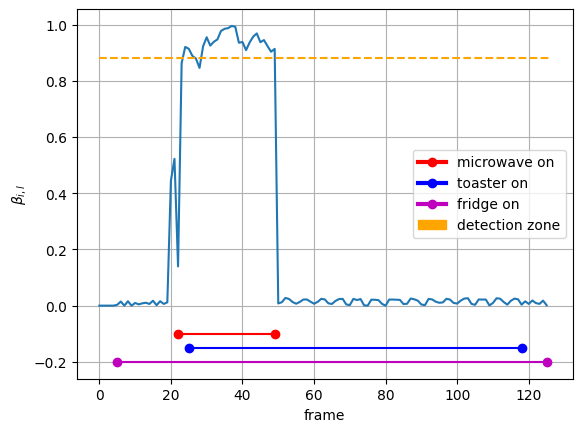

In [41]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dot_A_referencia_1=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][1:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A, A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))



  dot_A_referencia_1.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_1))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([25,118], [-0.15,-0.15], 'o-b', label='toaster on')

plt.plot([5,125], [-0.2,-0.2], 'o-m', label='fridge on')

#plt.plot([0,77],[0,0],'--', label='low level')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
plt.legend(handles=legend_elements, loc='best')

#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

plt.savefig('indirect_microwave_detection_DS1_final')
#plt.ylim(0,0.1)
plt.show()

In [42]:
U=np.array([H_C[60][0:k], H_D[20][0:k], H_B[40][0:k]])

In [43]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])

Tiempo de ejecución: 0.00506 segundos
Uso de memoria actual: 0.008699 MB
Pico de uso de memoria: 0.02944 MB


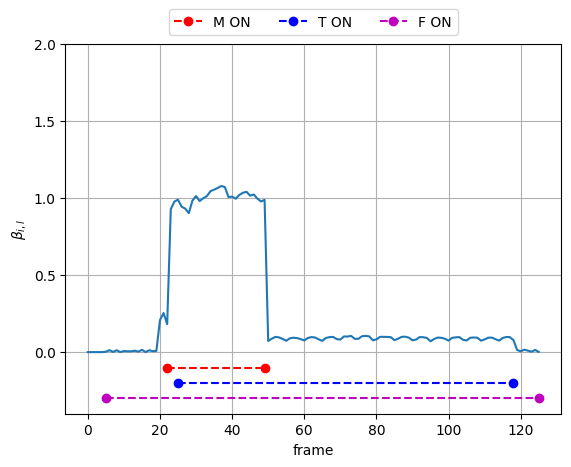

In [44]:
import time
import tracemalloc
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


inicio = time.time()
# Código a evaluar

tracemalloc.start()

U=np.array([H_C[60][0:k], H_D[20][0:k], H_B[40][0:k]])

v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])


dot_A_referencia_1=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))

  #x=np.dot(V[3], A)/(np.dot(A, A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))



  dot_A_referencia_1.append(x)

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")

tracemalloc.stop()

plt.plot(np.abs(dot_A_referencia_1))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o--r', label='M ON')

plt.plot([25,118], [-0.2,-0.2], 'o--b', label='T ON')

plt.plot([5,125], [-0.3,-0.3], 'o--m', label='F ON')

#plt.plot([0,77],[0,0],'--', label='low level')


#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Patch(facecolor='orange', edgecolor='orange',
    #                     label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#
#plt.legend(handles=legend_elements, loc='best')

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))
#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.xticks([0, 20, 40, 60, 80, 100, 120])
plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])

plt.savefig('indirect_microwave_detection_DS1_final_V1_nueva_base11')
plt.ylim(-0.4,2)
plt.show()

In [46]:
k=30
U=np.array([H_B[40][0:k], H_D[20][0:k], H_C[70][0:k]])

In [47]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])

Tiempo de ejecución: 0.00514 segundos
Uso de memoria actual: 0.008659 MB
Pico de uso de memoria: 0.0294 MB


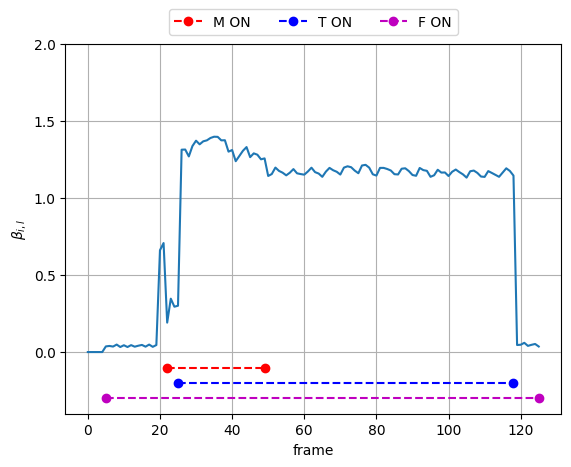

In [49]:
inicio = time.time()
tracemalloc.start()

k=30
U=np.array([H_B[40][0:k], H_D[20][0:k], H_C[70][0:k]])

v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

#v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3])


dot_A_referencia_11=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2])) #correcto

 #x=np.dot(V[3], A)

  #x=np.dot(A, V[3])



  #x=np.dot(V[3], A)/(np.dot(A,A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))


  dot_A_referencia_11.append(x)

  i=i+1


fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")


plt.plot(np.abs(dot_A_referencia_11))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([56,82],[1.5,1.5],'o-g', label='toaster on')

#plt.plot([57,89],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')


#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o--r', label='M ON')

plt.plot([25,118], [-0.2,-0.2], 'o--b', label='T ON')

plt.plot([5,125], [-0.3,-0.3], 'o--m', label='F ON')

#plt.plot([0,77],[0,0],'--', label='low level')


#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Patch(facecolor='orange', edgecolor='orange',
    #                     label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#
#plt.legend(handles=legend_elements, loc='best')

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))
#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.xticks([0, 20, 40, 60, 80, 100, 120])
#plt.yticks([0.00, 0.50, 1.00, 1.50])




#plt.plot([0,126],[1.11,1.11],'--', color='orange', label='detection zone')


#plt.plot([22,49], [-0.001,-0.001], 'o-r', label='microwave on')

#plt.plot([26,118], [-0.0015,-0.0015], 'o-b', label='toaster on')

#plt.plot([5,125], [-0.002,-0.002], 'o-m', label='fridge on')

#plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Patch(facecolor='orange', edgecolor='orange',
    #                     label='detection zone')]

#plt.legend(handles=legend_elements, loc='best')
#plt.ylim(0,0.1)
#plt.ylim(-0.005,0.1)

plt.xticks([0, 20, 40, 60, 80, 100, 120])
plt.yticks([0.00, 0.50, 1.00, 1.50,2.00])
plt.savefig('indirect_toaster_detection_ds1_final_V1_nueva_base11')
plt.ylim(-0.4,2)
plt.show()

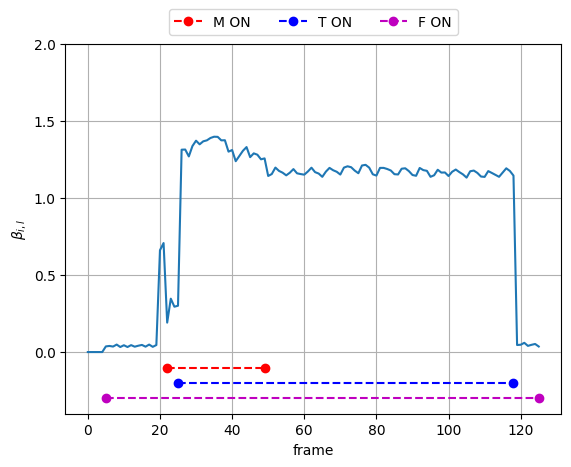

Memoria actual: 1.862243 MB; Pico: 2.066536 MB


In [50]:
import tracemalloc

tracemalloc.start()


dot_A_referencia_111=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  #x=np.dot(A,A)
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))
  dot_A_referencia_111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_111))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

#plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

plt.plot([22,49], [-0.1,-0.1], 'o--r', label='M ON')

plt.plot([25,118], [-0.2,-0.2], 'o--b', label='T ON')

plt.plot([5,125], [-0.3,-0.3], 'o--m', label='F ON')


#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Line2D([0], [0], marker='o', color='w', label='false positive',
    #                      markerfacecolor='black', markersize=10),
     #              Patch(facecolor='orange', edgecolor='orange',
      #                   label='detection zone')]

plt.xticks([0, 20, 40, 60, 80, 100, 120])
plt.yticks([0.00, 0.50, 1.00, 1.50, 2.00])
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)
#plt.ylim(-1,3)
plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.ylim(-0.4,2)

plt.savefig('indirect_fridge_detection_ds1_final_nueva_base11')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(-0.4,2)


plt.show()

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Memoria actual: {current / 10**6} MB; Pico: {peak / 10**6} MB")


memoria sin gráfica

In [51]:
import tracemalloc

tracemalloc.start()


dot_A_referencia_111=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  #x=np.dot(A,A)
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))
  dot_A_referencia_111.append(x)

  i=i+1
#plt.plot(np.abs(dot_A_referencia_111))
#plt.title('Toaster detection with k=30')



#plt.xlabel('frame')
#plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

#plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

#plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

#plt.plot([22,49], [-0.1,-0.1], 'o--r', label='M ON')

#plt.plot([25,118], [-0.2,-0.2], 'o--b', label='T ON')

#plt.plot([5,125], [-0.3,-0.3], 'o--m', label='F ON')


#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Line2D([0], [0], marker='o', color='w', label='false positive',
    #                      markerfacecolor='black', markersize=10),
     #              Patch(facecolor='orange', edgecolor='orange',
      #                   label='detection zone')]

#plt.xticks([0, 20, 40, 60, 80, 100, 120])
#plt.yticks([0.00, 0.50, 1.00, 1.50, 2.00])
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)
#plt.ylim(-1,3)
#plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

#plt.ylim(-0.4,2)

#plt.savefig('indirect_fridge_detection_ds1_final_nueva_base11')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(-0.4,2)


#plt.show()

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Memoria actual: {current / 10**6} MB; Pico: {peak / 10**6} MB")

Memoria actual: 0.006334 MB; Pico: 0.02667 MB


In [52]:
U=np.array([H_C[60][0:k], H_B[40][0:k], H_D[30][0:k]])




v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

V=np.array([v1,v2,v3])

Tiempo de ejecución: 0.00475 segundos
Uso de memoria actual: 0.008459 MB
Pico de uso de memoria: 0.029176 MB


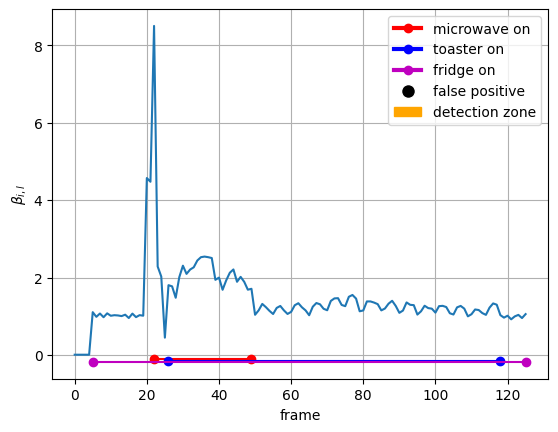

In [53]:
inicio = time.time()
tracemalloc.start()




U=np.array([H_C[60][0:k], H_B[40][0:k], H_D[30][0:k]])




v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

V=np.array([v1,v2,v3])


dot_A_referencia_1=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[2], A)/(np.dot(V[2], V[2]))   #correcto
  #x=np.dot(V[3], A)/(np.dot(A, A))
  #x=np.dot(V[3], A)

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))




  dot_A_referencia_1.append(x)

  i=i+1


fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")


plt.plot(np.abs(dot_A_referencia_1))

#plt.title('toster detection $k \in [0:30]$; aggregate reference frame=$A_{0}$')

#plt.savefig('fridge_detection.png')

#plt.plot([10,45],[-0.2,-0.2],'o-m', label='toaster ON')

#plt.plot([3,37],[-0.4,-0.4],'o-b', label='microwave ON')

#plt.plot([24,54],[-0.6,-0.6],'o-g', label='LED TV ON')

#plt.plot([17,24],[-0.8,-0.8],'o-c', label='LED TV stand-by')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.ylim(0,1.7)

#plt.grid()

#plt.plot([14,70], [1.5,1.5], 'o-g', label='toaster ON')


#plt.savefig('tost detection with k=30')

#plt.plot([0,76],[0,0],'--', label='inactive frame')

#plt.plot([0,76],[0.22,0.22],'--', label='inactive frame')


plt.grid()
plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.15,-0.15], 'o-b', label='toaster on')

plt.plot([5,125], [-0.18,-0.18], 'o-m', label='fridge on')


#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Line2D([0], [0], marker='o', color='w', label='false positive',
                          markerfacecolor='black', markersize=10),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)

plt.savefig('indirect_fridge_detection_ds1_final_sin_fundamental')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(0,0.1)


plt.show()


In [ ]:
#sin la fundamental y con el máximo número de armónicos

In [54]:
k=30
U=np.array([H_A[0][0:k], H_C[60][0:k], H_B[40][0:k], H_D[30][0:k]])

In [55]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

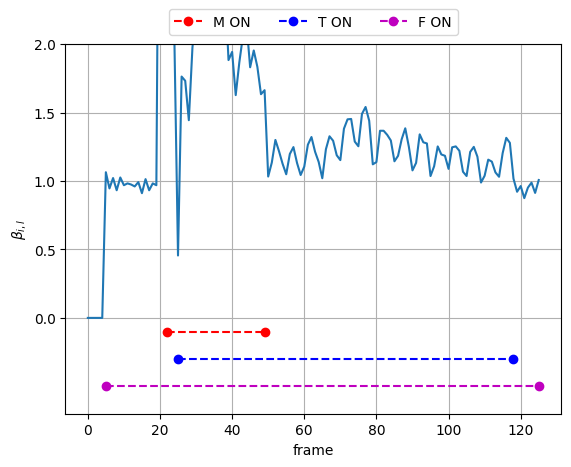

In [56]:
dot_A_referencia_111=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:k]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))
  dot_A_referencia_111.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_111))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()




#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o--r', label='M ON')

plt.plot([25,118], [-0.3,-0.3], 'o--b', label='T ON')

plt.plot([5,125], [-0.5,-0.5], 'o--m', label='F ON')

#plt.plot([0,77],[0,0],'--', label='low level')


#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Patch(facecolor='orange', edgecolor='orange',
    #                     label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
#
plt.legend(handles=legend_elements, loc='best')

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))
#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
plt.ylim(-0.7,2)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.xticks([0, 20, 40, 60, 80, 100, 120])
plt.yticks([0.00, 0.50, 1.00, 1.50, 2.00])

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

#plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

#plt.plot([22,49], [-0.2,-0.2], 'o-r', label='microwave on')

#plt.plot([26,118], [-0.4,-0.4], 'o-b', label='toaster on')

#plt.plot([5,125], [-0.6,-0.6], 'o-m', label='fridge on')


#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

#legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
 #                  Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
  #                 Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
   #                Line2D([0], [0], marker='o', color='w', label='false positive',
    #                      markerfacecolor='black', markersize=10),
     #              Patch(facecolor='orange', edgecolor='orange',
      #                   label='detection zone')]

#plt.legend(handles=legend_elements, loc='best')
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)

plt.savefig('indirect_fridge_detection_ds1_final_V1')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(0,0.1)



plt.show()

$\alpha$

In [ ]:
#nominal_micro=(windows[30]['BIValor[Amperios]'])*(-1)
#plt.plot(windows[30]['BIValor[Amperios]']*(-1))

#plt.xlabel('samples')
#plt.ylabel('current')
#plt.title('microwave nominal current (phase change)')

#plt.savefig('microwave_nominal_current(phase frame)')

In [58]:
nominal_micro=H_B[30][0:10]

In [ ]:
#nominal_tosta=windows[40]['CIValor[Amperios]']
#plt.plot(windows[40]['CIValor[Amperios]'])

#plt.xlabel('samples')
#plt.ylabel('current')
#plt.title('toaster nominal current')

#plt.savefig('toaster_nominal_current')

In [59]:
nominal_tosta=H_C[40][0:10]

In [ ]:
#nominal_hela=windows[20]['DIValor[Amperios]']
#plt.plot(windows[30]['DIValor[Amperios]'])

#plt.xlabel('samples')
#plt.ylabel('current')
#plt.title('fridge nominal current')
#plt.savefig('fridge_nominal_current')

In [60]:
nominal_hela=H_D[20][0:10]

In [61]:
np_list1 = np.array(nominal_micro)# heladera nominal
np_list2 = np.array(nominal_tosta)# tostadora nominal

micro_tosta= np_list1 + np_list2
micro_tosta=list(micro_tosta)

In [62]:
np_list3=np.array(nominal_hela)
micro_tosta_hela=micro_tosta+np_list3

In [63]:
tosta_hela=np_list2+np_list3

In [64]:
micro_hela=np_list1+np_list3

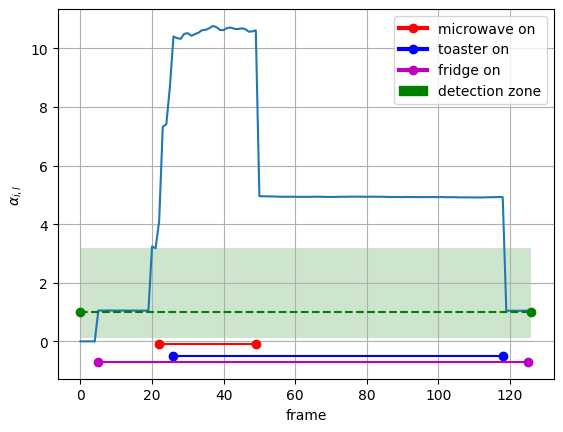

In [65]:
#hela_sola
nominal_hela=H_D[20][0:30]

comp_agregada_AA_100_3arm=[]
i=0
while i<len(windows):

  A=H_A[i][0:3]   #probar con recorte de frame 0:100


  q=np.dot(nominal_hela[0:3], A)/(np.dot(nominal_hela[0:3],nominal_hela[0:3]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_3arm.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_3arm)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.5,-0.5], 'o-b', label='toaster on')

plt.plot([5,125], [-0.7,-0.7], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [3.3, 3.3], facecolor="green", alpha=0.2)

#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{i,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
plt.savefig('only_hela_ds1')

#plt.plot(RMS)

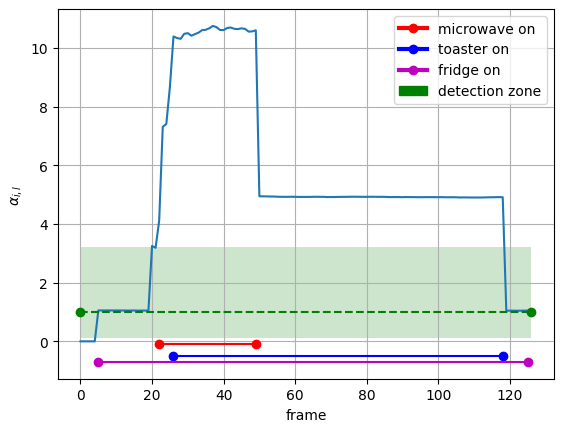

In [66]:
#hela_sola

comp_agregada_AA_100_5arm=[]
i=0
while i<len(windows):

  A=H_A[i][0:5]   #probar con recorte de frame 0:100


  q=np.dot(nominal_hela[0:5], A)/(np.dot(nominal_hela[0:5],nominal_hela[0:5]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_5arm.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_5arm)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.5,-0.5], 'o-b', label='toaster on')

plt.plot([5,125], [-0.7,-0.7], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [3.3, 3.3], facecolor="green", alpha=0.2)

#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{i,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
plt.savefig('only_hela_ds1')

#plt.plot(RMS)

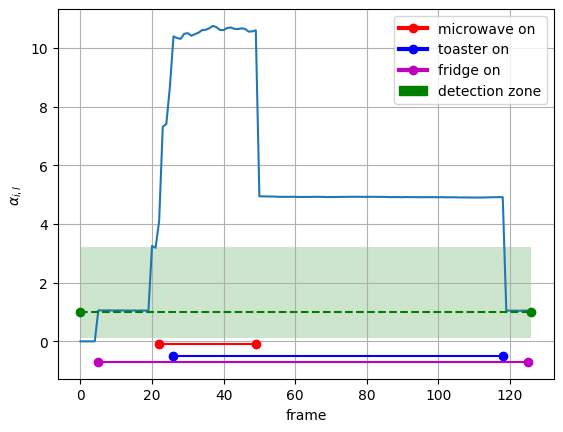

In [67]:
#hela_sola

comp_agregada_AA_100_10arm=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(nominal_hela[0:10], A)/(np.dot(nominal_hela[0:10],nominal_hela[0:10]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_10arm.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_10arm)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.5,-0.5], 'o-b', label='toaster on')

plt.plot([5,125], [-0.7,-0.7], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [3.3, 3.3], facecolor="green", alpha=0.2)

#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{i,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
plt.savefig('only_hela_ds1')

#plt.plot(RMS)

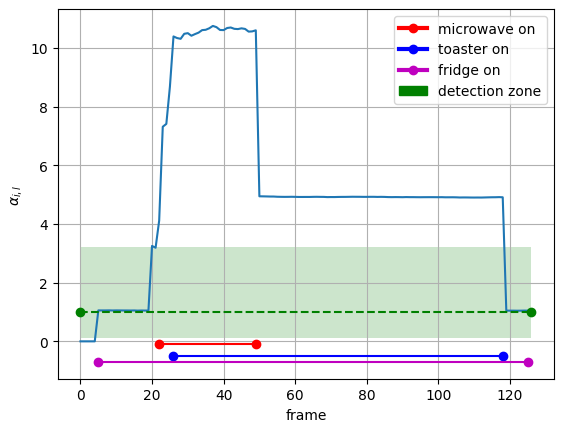

In [68]:
#hela_sola

comp_agregada_AA_100_30arm=[]
i=0
while i<len(windows):

  A=H_A[i][0:30]   #probar con recorte de frame 0:100


  q=np.dot(nominal_hela[0:30], A)/(np.dot(nominal_hela[0:30],nominal_hela[0:30]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_30arm.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_30arm)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.5,-0.5], 'o-b', label='toaster on')

plt.plot([5,125], [-0.7,-0.7], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [3.3, 3.3], facecolor="green", alpha=0.2)

#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{i,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
#plt.savefig('only_hela_ds1')


#plt.plot(RMS)

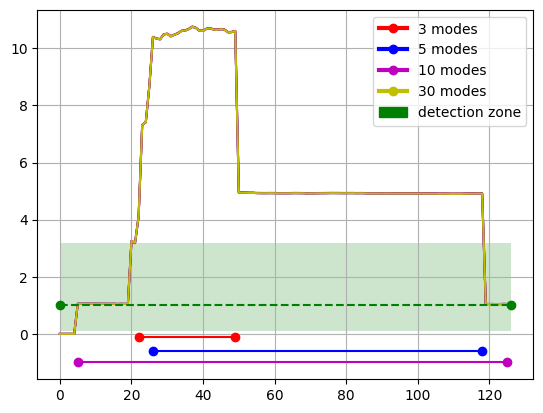

In [69]:
plt.plot(comp_agregada_AA_100_3arm, color='r', label='3arm')
plt.plot(comp_agregada_AA_100_5arm, color='b', label='5arm')
plt.plot(comp_agregada_AA_100_10arm, color='m',label='10arm')
plt.plot(comp_agregada_AA_100_30arm, color='y',label='30arm')

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.6,-0.6], 'o-b', label='toaster on')

plt.plot([5,125], [-1,-1], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='3 modes'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='5 modes'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='10 modes'),
                   Line2D([0], [0], marker='o',color='y',lw=3, label='30 modes'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)




plt.grid()

plt.savefig('direct_modes_comparison_fridge')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


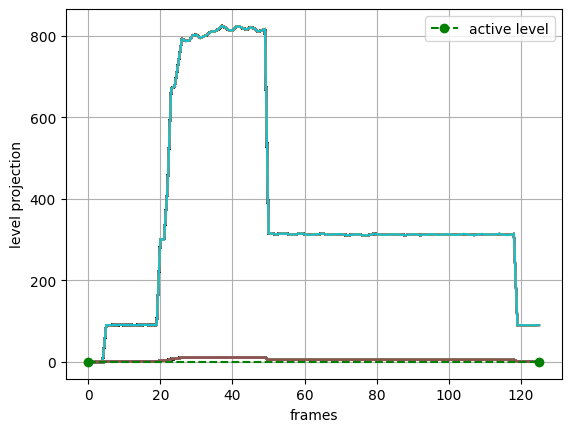

In [70]:
#hela sola con variación

j=0
while j<len(windows):
  nominal_hela=H_D[j][0:30] #se le puede acortar el tamaño de la ventana.


  comp_agregada_AA=[]
  i=0
  while i<len(windows):

    A=H_A[i][0:30]


    q=np.dot(nominal_hela, A)/(np.dot(nominal_hela,nominal_hela))
    comp_agregada_AA.append(abs(q))
    plt.plot(comp_agregada_AA)
    #plt.show()

    #plt.plot([0,121], [1,1], 'o--g', label='active level')
    #plt.plot([0,14], [0.97,0.97], 'o--m', label='min level projection')
    #plt.plot([0,14], [0.87,0.87], 'o--m')
    #plt.plot([0,14], [0.9,0.9], 'o--m', label='max level projection')

    i=i+1
  j=j+1
plt.plot([0,125], [1,1], 'o--g', label='active level')
#plt.plot([0,121], [0.96,0.96], 'o--m', label='max level detection')
#plt.plot([0,121], [0.86,0.86], 'o--r', label='min level detection')

plt.xlabel('frames')
plt.ylabel('level projection')
#plt.title('minimum and maximum detection with nominal frame')
plt.legend()
plt.grid()
#plt.savefig('min_max_detection')

(-1.0, 1.4)

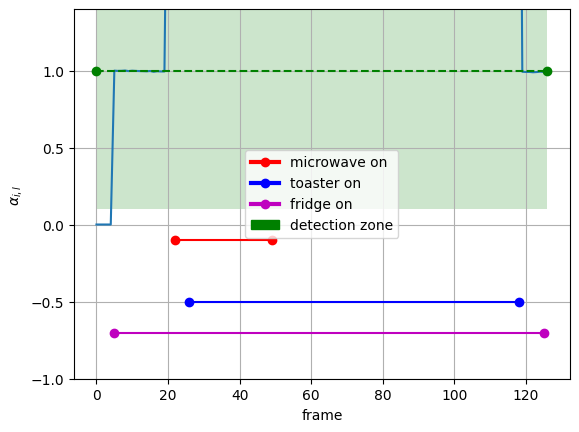

In [71]:
#hela_sola

comp_agregada_AA_100_10arm_helasola=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(nominal_hela[0:10], A)/(np.dot(nominal_hela[0:10],nominal_hela[0:10]))

  q=np.dot(H_A[10][0:10], A)/(np.dot(H_A[10][0:10],H_A[10][0:10]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_10arm_helasola.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_10arm_helasola)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.5,-0.5], 'o-b', label='toaster on')

plt.plot([5,125], [-0.7,-0.7], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [3.3, 3.3], facecolor="green", alpha=0.2)

#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{i,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()

plt.ylim(-1,1.4)
#plt.savefig('only_hela_ds1')

#plt.plot(RMS)

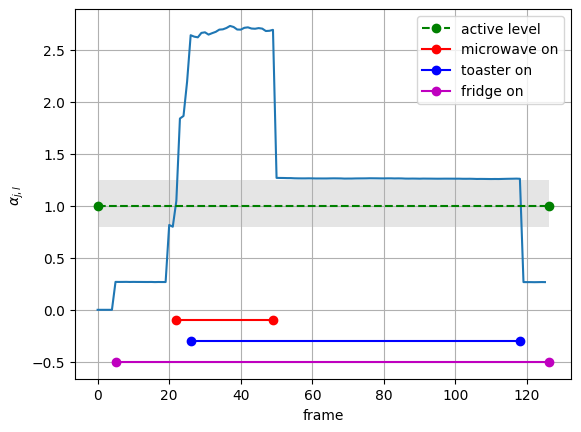

In [72]:
#tosta_sola

comp_agregada_AA_100_tostasola=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(nominal_tosta, A)/(np.dot(nominal_tosta,nominal_tosta))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_tostasola.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_tostasola)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')



plt.fill_between([0, 126], [1, 1], [1.25, 1.25], facecolor="grey", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.8, 0.8], facecolor="grey", alpha=0.2)

#plt.fill_between([0, 126], [1, 1], [-1.03, -1.03], facecolor="green", alpha=0.2)


#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')
#plt.title('fridge + toaster+microwave projection')
plt.legend()
plt.grid()
plt.savefig('tosta_sola_ds1')

Tiempo de ejecución: 0.00267 segundos
Uso de memoria actual: 234.919853 MB
Pico de uso de memoria: 253.111239 MB


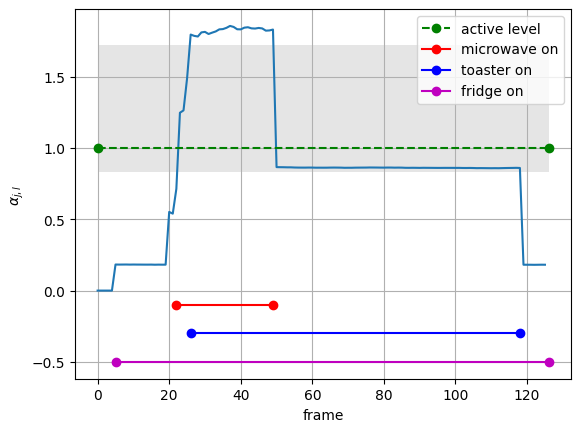

In [73]:
#micro_solo
inicio = time.time()
tracemalloc.start()



comp_agregada_AA_100_microsolo=[]
i=0
while i<len(windows):

  A=H_A[i][0:2]   #probar con recorte de frame 0:100


  q=np.dot(nominal_micro[0:2], A)/(np.dot(nominal_micro[0:2],nominal_micro[0:2]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_microsolo.append(abs(q))

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")

plt.plot(comp_agregada_AA_100_microsolo)

plt.plot([0,126], [1,1], 'o--g', label='active level')



plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')


plt.fill_between([0, 126], [1, 1], [1.72, 1.72], facecolor="grey", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.83, 0.83], facecolor="grey", alpha=0.2)


#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')
#plt.title('fridge + toaster+microwave projection')
plt.legend()
plt.grid()
plt.savefig('micro_solo_DS1')

Tiempo de ejecución: 0.00564 segundos
Uso de memoria actual: 235.839233 MB
Pico de uso de memoria: 253.111239 MB


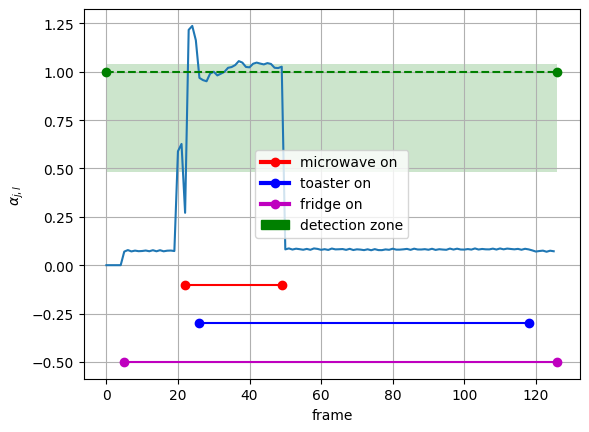

In [74]:
#micro_tosta_hela
inicio = time.time()
tracemalloc.start()


comp_agregada_AA_100_3arm_micro_tosta_hela=[]
i=0
while i<len(windows):

  A=H_A[i][1:10]   #probar con recorte de frame 0:100


  q=np.dot(H_A[30][1:10], A)/(np.dot(H_A[30][1:10],H_A[30][1:10]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_3arm_micro_tosta_hela.append(abs(q))

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")

plt.plot(comp_agregada_AA_100_3arm_micro_tosta_hela)


plt.plot([0,126], [1,1], 'o--g', label='active level')





plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.fill_between([0, 126], [1, 1], [1.04, 1.04], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.48, 0.48], facecolor="green", alpha=0.2)


#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
#plt.savefig('frames_projection_sum3ap')


#plt.plot(RMS)
#plt.grid()
#plt.title( 'RMS - Aggregate signal')
#plt.xlabel('frames')
#plt.ylabel('current [A]')

#ax = plt.gca()

#rect1 = patches.Rectangle((-1,0),
 #                16,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect2 = patches.Rectangle((14,7),
 #                44,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)
#rect3 = patches.Rectangle((43,3),
 #                71,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect4 = patches.Rectangle((112,0),
 #                10,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#ax.add_patch(rect1)
#ax.add_patch(rect2)
#ax.add_patch(rect3)
#ax.add_patch(rect4)
plt.savefig('micro_tosta_hela_DS1')

Tiempo de ejecución: 0.00519 segundos
Uso de memoria actual: 236.828411 MB
Pico de uso de memoria: 253.111239 MB


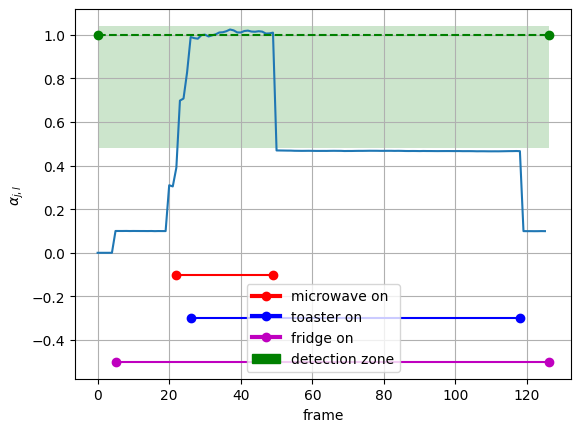

In [75]:
#micro_tosta_hela
inicio = time.time()
tracemalloc.start()


comp_agregada_AA_100_5arm=[]
i=0
while i<len(windows):

  A=H_A[i][0:5]   #probar con recorte de frame 0:100


  q=np.dot(H_A[30][0:5], A)/(np.dot(H_A[30][0:5],H_A[30][0:5]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_5arm.append(abs(q))

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")

plt.plot(comp_agregada_AA_100_5arm)


plt.plot([0,126], [1,1], 'o--g', label='active level')





plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.fill_between([0, 126], [1, 1], [1.04, 1.04], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.48, 0.48], facecolor="green", alpha=0.2)


#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
#plt.savefig('frames_projection_sum3ap')


#plt.plot(RMS)
#plt.grid()
#plt.title( 'RMS - Aggregate signal')
#plt.xlabel('frames')
#plt.ylabel('current [A]')

#ax = plt.gca()

#rect1 = patches.Rectangle((-1,0),
 #                16,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect2 = patches.Rectangle((14,7),
 #                44,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)
#rect3 = patches.Rectangle((43,3),
 #                71,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect4 = patches.Rectangle((112,0),
 #                10,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#ax.add_patch(rect1)
#ax.add_patch(rect2)
#ax.add_patch(rect3)
#ax.add_patch(rect4)
plt.savefig('micro_tosta_hela_DS1')

Tiempo de ejecución: 0.00393 segundos
Uso de memoria actual: 237.773271 MB
Pico de uso de memoria: 253.111239 MB


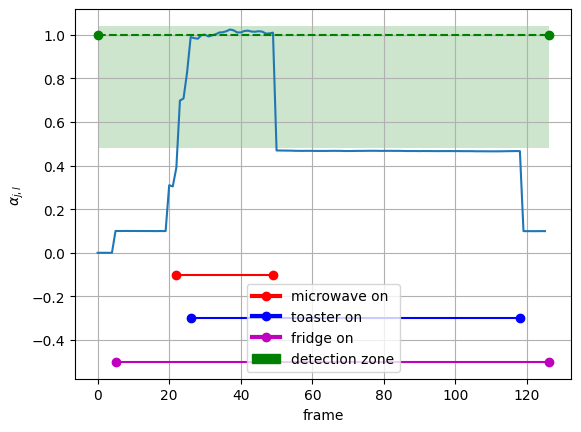

In [76]:
#micro_tosta_hela
inicio = time.time()
tracemalloc.start()


comp_agregada_AA_100_10arm_micro_tosta_hela=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(H_A[30][0:10], A)/(np.dot(H_A[30][0:10],H_A[30][0:10]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_10arm_micro_tosta_hela.append(abs(q))

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")

plt.plot(comp_agregada_AA_100_10arm_micro_tosta_hela)


plt.plot([0,126], [1,1], 'o--g', label='active level')





plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.fill_between([0, 126], [1, 1], [1.04, 1.04], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.48, 0.48], facecolor="green", alpha=0.2)


#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
#plt.savefig('frames_projection_sum3ap')


#plt.plot(RMS)
#plt.grid()
#plt.title( 'RMS - Aggregate signal')
#plt.xlabel('frames')
#plt.ylabel('current [A]')

#ax = plt.gca()

#rect1 = patches.Rectangle((-1,0),
 #                16,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect2 = patches.Rectangle((14,7),
 #                44,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)
#rect3 = patches.Rectangle((43,3),
 #                71,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect4 = patches.Rectangle((112,0),
 #                10,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#ax.add_patch(rect1)
#ax.add_patch(rect2)
#ax.add_patch(rect3)
#ax.add_patch(rect4)
plt.savefig('micro_tosta_hela_DS1')

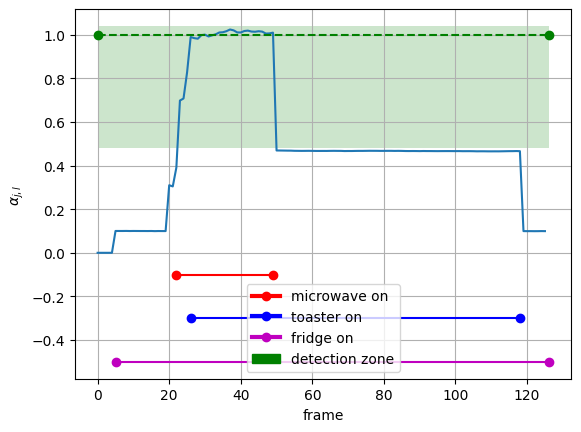

In [77]:
#micro_tosta_hela

comp_agregada_AA_100_30arm=[]
i=0
while i<len(windows):

  A=H_A[i][0:30]   #probar con recorte de frame 0:100


  q=np.dot(H_A[30][0:30], A)/(np.dot(H_A[30][0:30],H_A[30][0:30]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_30arm.append(abs(q))

  i=i+1

plt.plot(comp_agregada_AA_100_30arm)


plt.plot([0,126], [1,1], 'o--g', label='active level')





plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')



plt.fill_between([0, 126], [1, 1], [1.04, 1.04], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.48, 0.48], facecolor="green", alpha=0.2)


#plt.plot([19,44], [2.3,2.3], 'o-m', label='microwave+toaster+fridge ON')
plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')
#plt.title('fridge + toaster+microwave projection')
#plt.legend()
plt.grid()
#plt.savefig('frames_projection_sum3ap')


#plt.plot(RMS)
#plt.grid()
#plt.title( 'RMS - Aggregate signal')
#plt.xlabel('frames')
#plt.ylabel('current [A]')

#ax = plt.gca()

#rect1 = patches.Rectangle((-1,0),
 #                16,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect2 = patches.Rectangle((14,7),
 #                44,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)
#rect3 = patches.Rectangle((43,3),
 #                71,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#rect4 = patches.Rectangle((112,0),
 #                10,
  #               2,
   #              linewidth=2,
    #             edgecolor='m',
     #            fill = False)

#ax.add_patch(rect1)
#ax.add_patch(rect2)
#ax.add_patch(rect3)
#ax.add_patch(rect4)
plt.savefig('micro_tosta_hela_DS1')

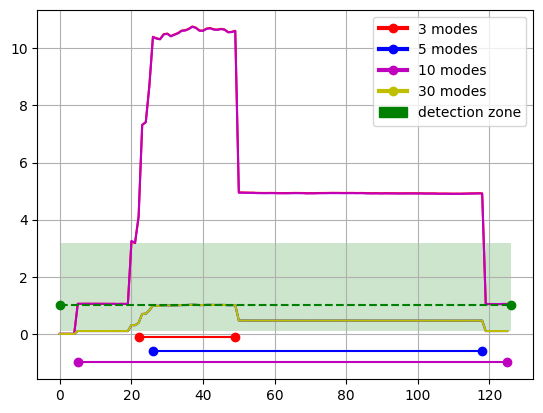

In [78]:
plt.plot(comp_agregada_AA_100_3arm, color='r', label='3arm')
plt.plot(comp_agregada_AA_100_5arm, color='b', label='5arm')
plt.plot(comp_agregada_AA_100_10arm, color='m',label='10arm')
plt.plot(comp_agregada_AA_100_30arm, color='y',label='30arm')

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.6,-0.6], 'o-b', label='toaster on')

plt.plot([5,125], [-1,-1], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='3 modes'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='5 modes'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='10 modes'),
                   Line2D([0], [0], marker='o',color='y',lw=3, label='30 modes'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [3.2, 3.2], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.1, 0.1], facecolor="green", alpha=0.2)




plt.grid()
plt.savefig('direct_modes_comparison_microwave_toaster_fridge')

Tiempo de ejecución: 0.00511 segundos
Uso de memoria actual: 240.405086 MB
Pico de uso de memoria: 253.111239 MB


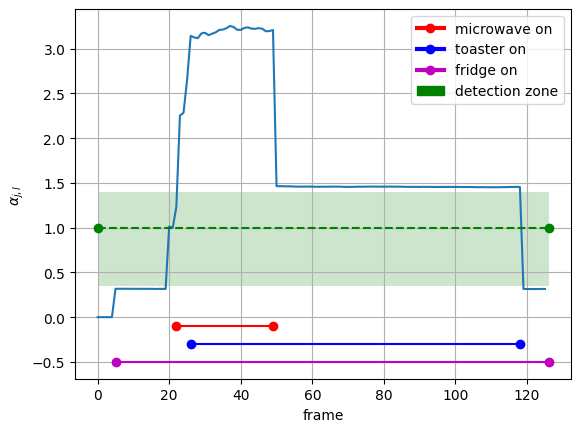

In [79]:
#micro_hela
inicio = time.time()
tracemalloc.start()

comp_agregada_AA_100_micro_hela=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(H_A[21][0:10], A)/(np.dot(H_A[21][0:10],H_A[21][0:10]))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_micro_hela.append(abs(q))

  i=i+1
fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")
plt.plot(comp_agregada_AA_100_micro_hela)

plt.plot([0,126], [1,1], 'o--g', label='active level')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [1.4, 1.4], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.35, 0.35], facecolor="green", alpha=0.2)

plt.grid()

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')

plt.savefig('micro_hela_ds1')



#plt.legend()

plt.show()

Tiempo de ejecución: 0.00349 segundos
Uso de memoria actual: 240.770454 MB
Pico de uso de memoria: 253.111239 MB


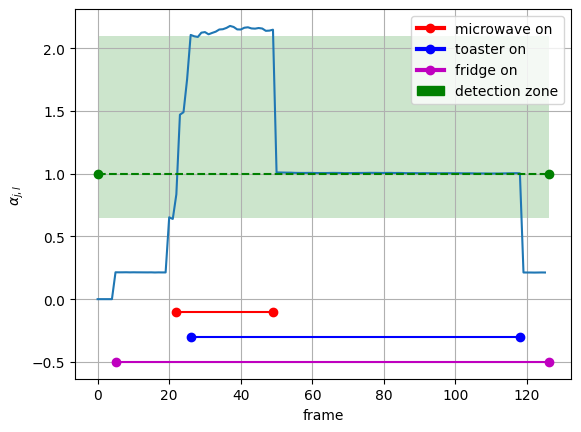

In [80]:
#tosta_hela

inicio = time.time()
tracemalloc.start()

comp_agregada_AA_100_tosta_hela=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(tosta_hela, A)/(np.dot(tosta_hela,tosta_hela))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_tosta_hela.append(abs(q))

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")





plt.plot(comp_agregada_AA_100_tosta_hela)

plt.plot([0,126], [1,1], 'o--g', label='active level')

plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')





legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')

plt.fill_between([0, 126], [1, 1], [2.1, 2.1], facecolor="green", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.65, 0.65], facecolor="green", alpha=0.2)

plt.grid()

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')

#plt.legend()

plt.savefig('tosta_hela_DS1')

Tiempo de ejecución: 0.00235 segundos
Uso de memoria actual: 241.642788 MB
Pico de uso de memoria: 253.111239 MB


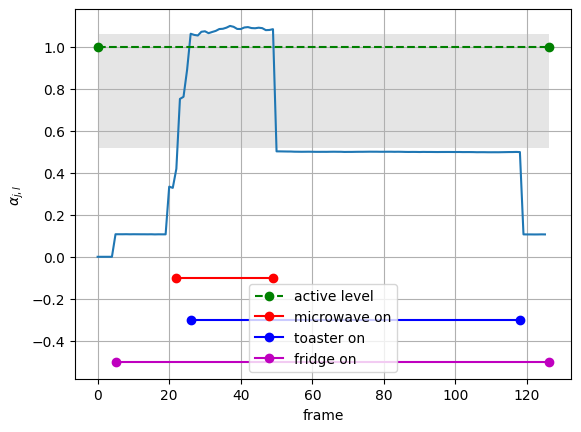

In [81]:
#micro_tosta
inicio = time.time()
tracemalloc.start()


comp_agregada_AA_100_micro_tosta=[]
i=0
while i<len(windows):

  A=H_A[i][0:10]   #probar con recorte de frame 0:100


  q=np.dot(micro_tosta, A)/(np.dot(micro_tosta,micro_tosta))

  #q= np.dot(np_sum, A)/(np.sqrt(np.dot(np_sum,np_sum))*np.sqrt(np.dot(A,A)))
  comp_agregada_AA_100_micro_tosta.append(abs(q))

  i=i+1

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.5f} segundos")

current, peak = tracemalloc.get_traced_memory()
print(f"Uso de memoria actual: {current / 10**6} MB")
print(f"Pico de uso de memoria: {peak / 10**6} MB")


plt.plot(comp_agregada_AA_100_micro_tosta)

plt.plot([0,126], [1,1], 'o--g', label='active level')

plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,126], [-0.5,-0.5], 'o-m', label='fridge on')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   #Line2D([0], [0], marker='o', color='w', label='false positive',
                    #      markerfacecolor='black', markersize=10),
                   Patch(facecolor='green', edgecolor='green',
                         label='detection zone')]

#plt.legend(handles=legend_elements, loc='best')


plt.legend()

plt.fill_between([0, 126], [1, 1], [1.06, 1.06], facecolor="grey", alpha=0.2)

plt.fill_between([0, 126], [1, 1], [0.52, 0.52], facecolor="grey", alpha=0.2)


plt.grid()

plt.xlabel('frame')
plt.ylabel(r'$\alpha_{j,l}$')

plt.savefig('micro_tosta_ds1')

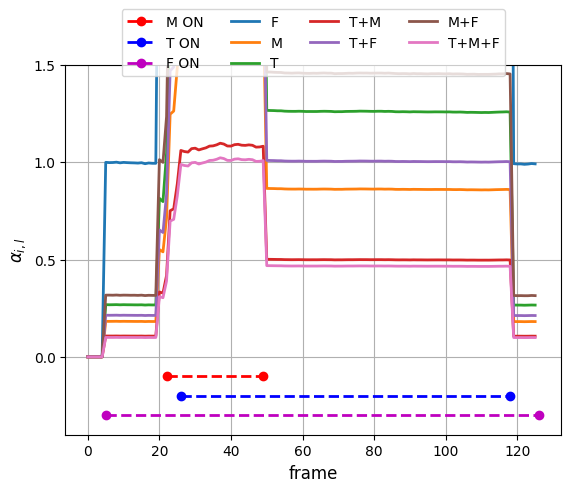

In [82]:
#plt.figure(figsize=(16,12))


plt.plot([22,49], [-0.1,-0.1], 'o--r', linewidth=2, label='M ON')

plt.plot([26,118], [-0.2,-0.2], 'o--b', linewidth=2, label='T ON')

plt.plot([5,126], [-0.3,-0.3], 'o--m',linewidth=2, label='F ON')


plt.plot(comp_agregada_AA_100_10arm_helasola, label='F', linewidth=2)#, marker='p')

plt.plot(comp_agregada_AA_100_microsolo, label='M',linewidth=2)#, marker='*')

plt.plot(comp_agregada_AA_100_tostasola, label='T', linewidth=2)#, marker='s')

plt.plot(comp_agregada_AA_100_micro_tosta,  label='T+M', linewidth=2)#,marker='D' )

plt.plot(comp_agregada_AA_100_tosta_hela, label='T+F', linewidth=2)#, marker='o')

plt.plot(comp_agregada_AA_100_micro_hela, label='M+F',linewidth=2)#, marker='x')

plt.plot(comp_agregada_AA_100_10arm_micro_tosta_hela, label='T+M+F',linewidth=2 )#, marker='d')



plt.ylim(-0.4,1.5)
plt.grid()




#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.plot([22,49], [-0.1,-0.1], 'o--r', linewidth=2, label='M ON')

#plt.plot([26,118], [-0.2,-0.2], 'o--b', linewidth=2, label='T ON')

#plt.plot([5,126], [-0.3,-0.3], 'o--m',linewidth=2, label='F ON')


plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='best',fontsize=11)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)

#plt.plot([0,126],[1,1],'--',label='active level', linewidth=3)

plt.xlabel('frame', fontsize=12)
plt.ylabel(r'$\alpha_{i,l}$', fontsize=12)

plt.xticks([0, 20, 40, 60, 80, 100, 120])
plt.yticks([0.00, 0.50, 1.00, 1.50])


plt.savefig('DS1_comparison_v3_1')

Modos de Fourier para detección mínima

micro

In [83]:
U=np.array([H_A[t][0:3], H_C[60][0:3], H_D[20][0:3], H_B[40][0:3]])

In [84]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

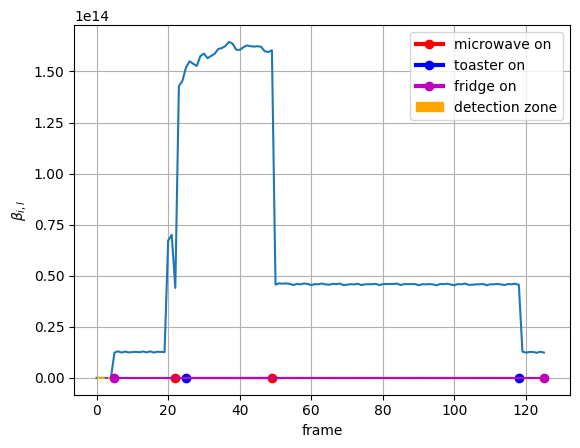

In [85]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dot_A_referencia_micro_3arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:3]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A, A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))
  dot_A_referencia_micro_3arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_3arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([25,118], [-0.15,-0.15], 'o-b', label='toaster on')

plt.plot([5,125], [-0.2,-0.2], 'o-m', label='fridge on')

#plt.plot([0,77],[0,0],'--', label='low level')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
plt.legend(handles=legend_elements, loc='best')

#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

plt.savefig('indirect_microwave_detection_DS1_3_arm')
#plt.ylim(0,0.1)
plt.show()

In [86]:
U=np.array([H_A[t][0:5], H_C[60][0:5], H_D[20][0:5], H_B[40][0:5]])

In [87]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

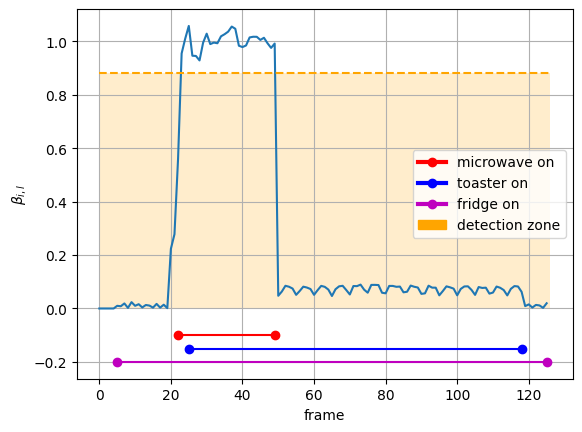

In [88]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dot_A_referencia_micro_5arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:5]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A, A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))
  dot_A_referencia_micro_5arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_5arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([25,118], [-0.15,-0.15], 'o-b', label='toaster on')

plt.plot([5,125], [-0.2,-0.2], 'o-m', label='fridge on')

#plt.plot([0,77],[0,0],'--', label='low level')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
plt.legend(handles=legend_elements, loc='best')

#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

plt.savefig('indirect_microwave_detection_DS1_final')
#plt.ylim(0,0.1)
plt.show()

In [89]:
U=np.array([H_A[t][0:10], H_C[60][0:10], H_D[20][0:10], H_B[40][0:10]])

In [90]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

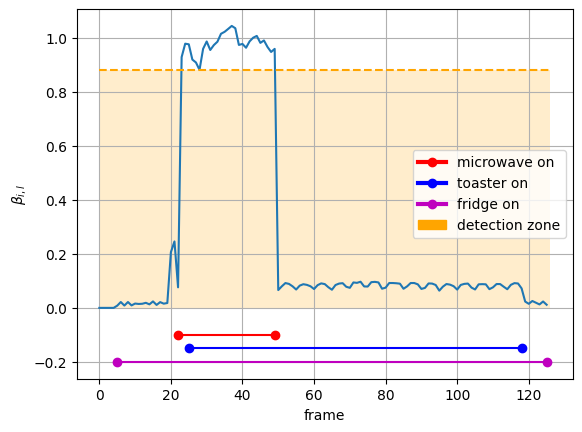

In [91]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dot_A_referencia_micro_10arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A, A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))
  dot_A_referencia_micro_10arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_10arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([25,118], [-0.15,-0.15], 'o-b', label='toaster on')

plt.plot([5,125], [-0.2,-0.2], 'o-m', label='fridge on')

#plt.plot([0,77],[0,0],'--', label='low level')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
plt.legend(handles=legend_elements, loc='best')

#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

plt.savefig('indirect_microwave_detection_DS1_final')
#plt.ylim(0,0.1)
plt.show()

In [92]:
U=np.array([H_A[t][0:30], H_C[60][0:30], H_D[20][0:30], H_B[40][0:30]])

In [93]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

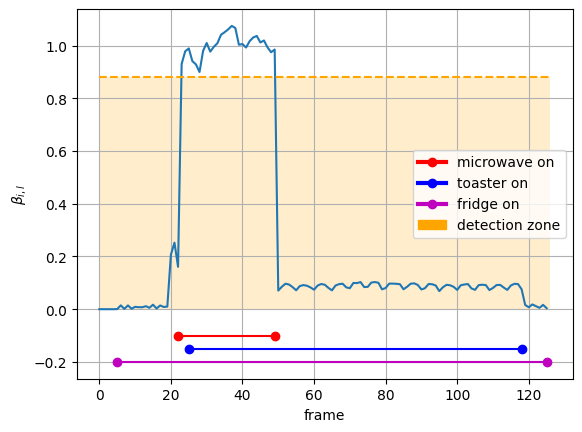

In [94]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dot_A_referencia_micro_30arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A, A))

  #x=np.dot(V[3], A)/(np.sqrt(np.dot(A,A))*np.sqrt(np.dot(V[3],V[3])))
  dot_A_referencia_micro_30arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_micro_30arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([25,118], [-0.15,-0.15], 'o-b', label='toaster on')

plt.plot([5,125], [-0.2,-0.2], 'o-m', label='fridge on')

#plt.plot([0,77],[0,0],'--', label='low level')


legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

# Create the figure
#fig, ax = plt.subplots()
plt.legend(handles=legend_elements, loc='best')

#plt.legend(bbox_to_anchor=(1.05, 0.3))
#plt.legend()
#plt.ylim(0,0.1)

#ax.fill_between([0,0],[0.43, 0,43] where=y > threshold,
 #               color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

plt.savefig('indirect_microwave_detection_DS1_final')
#plt.ylim(0,0.1)
plt.show()

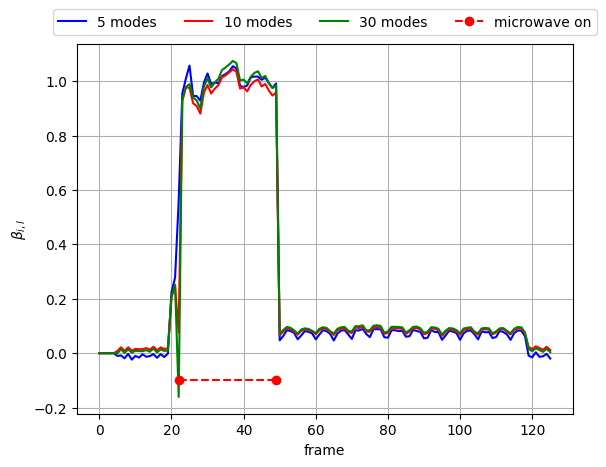

In [95]:
plt.plot(dot_A_referencia_micro_5arm, color='blue', label='5 modes')
#plt.plot(dot_A_referencia_micro_3arm, color='m', label='3 modes')
plt.plot(dot_A_referencia_micro_10arm, color='red', label='10 modes')
plt.plot(dot_A_referencia_micro_30arm, color='green', label='30 modes')

#plt.plot([0,126],[0.88,0.88],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o--r', label='microwave on')

#plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

#plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')

#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [0.7, 0.7], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='blue', lw=3, label='5 modes'),
                   Line2D([0], [0], marker='o',color='red', lw=3, label='10 modes'),
                   Line2D([0], [0], marker='o',color='green',lw=3, label='30 modes'),]
                   #Patch(facecolor='orange', edgecolor='orange',
                    #     label='detection zone')]


plt.ylabel(r'$\beta_{i,l}$')



plt.xlabel('frame')
#plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

#plt.plot([25,118], [-0.15,-0.15], 'o-b', label='toaster on')

#plt.plot([5,125], [-0.2,-0.2], 'o-m', label='fridge on')

#plt.legend(handles=legend_elements, loc='best')

#plt.legend()

plt.grid()

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.savefig('microwave_comparison_modes_11')
#plt.legend()



tosta

In [96]:
U=np.array([H_A[t][0:3], H_B[40][0:3], H_D[20][0:3], H_C[70][0:3]])

In [97]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

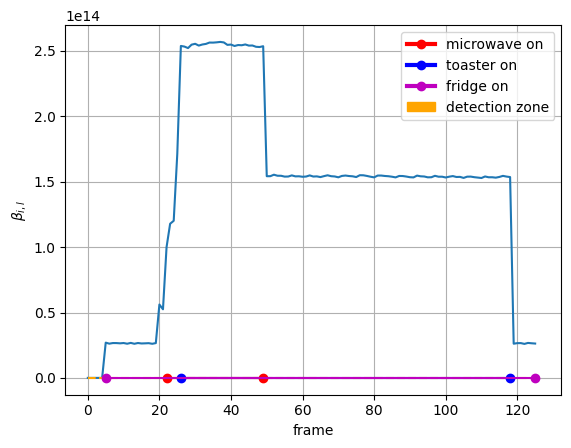

In [98]:
dot_A_referencia_tosta_3arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:3]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A,A))


  dot_A_referencia_tosta_3arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_3arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([56,82],[1.5,1.5],'o-g', label='toaster on')

#plt.plot([57,89],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')





plt.plot([0,126],[1.11,1.11],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')

plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#plt.ylim(0,0.1)

plt.savefig('indirect_toaster_detection_ds1_final')
#plt.ylim(0,0.1)
plt.show()

In [99]:
U=np.array([H_A[t][0:5], H_B[40][0:5], H_D[20][0:5], H_C[70][0:5]])


In [100]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

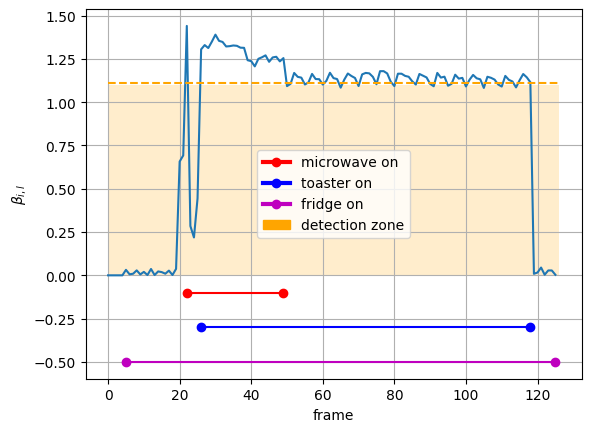

In [101]:
dot_A_referencia_tosta_5arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:5]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A,A))


  dot_A_referencia_tosta_5arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_5arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([56,82],[1.5,1.5],'o-g', label='toaster on')

#plt.plot([57,89],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')





plt.plot([0,126],[1.11,1.11],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')

plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#plt.ylim(0,0.1)

plt.savefig('indirect_toaster_detection_ds1_final')
#plt.ylim(0,0.1)
plt.show()


In [102]:
U=np.array([H_A[t][0:10], H_B[40][0:10], H_D[20][0:10], H_C[70][0:10]])

In [103]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

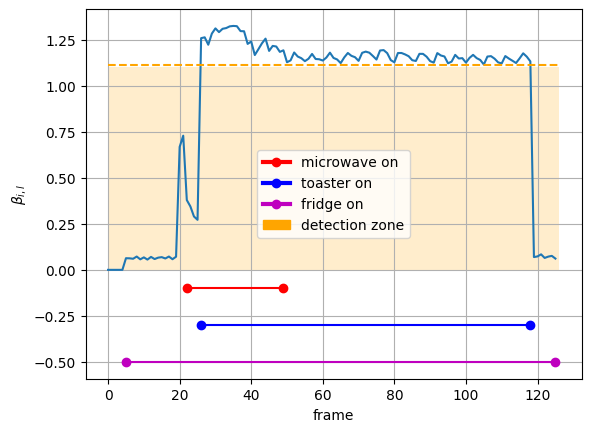

In [104]:
dot_A_referencia_tosta_10arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A,A))


  dot_A_referencia_tosta_10arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_10arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([56,82],[1.5,1.5],'o-g', label='toaster on')

#plt.plot([57,89],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')





plt.plot([0,126],[1.11,1.11],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')

plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#plt.ylim(0,0.1)

plt.savefig('indirect_toaster_detection_ds1_final')
#plt.ylim(0,0.1)
plt.show()

In [105]:
U=np.array([H_A[t][0:30], H_B[40][0:30], H_D[20][0:30], H_C[70][0:30]])

In [106]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

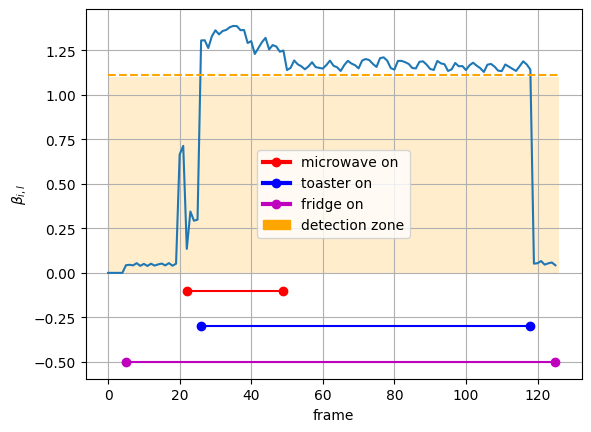

In [107]:
dot_A_referencia_tosta_30arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))

  #x=np.dot(V[3], A)/(np.dot(A,A))


  dot_A_referencia_tosta_30arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_tosta_30arm))
#plt.title('Toaster detection with k=30')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.25,-0.25],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.3,-0.3],'o-g', label='only microwave ON')

plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([56,82],[1.5,1.5],'o-g', label='toaster on')

#plt.plot([57,89],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')





plt.plot([0,126],[1.11,1.11],'--', color='orange', label='detection zone')


plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')

plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#plt.ylim(0,0.1)

plt.savefig('indirect_toaster_detection_ds1_final')
#plt.ylim(0,0.1)
plt.show()

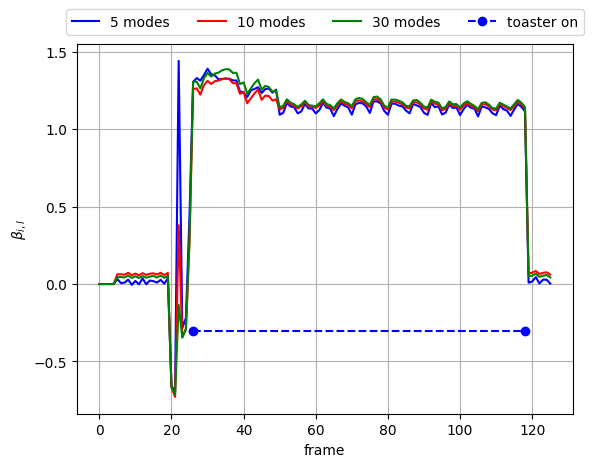

In [108]:
plt.plot(dot_A_referencia_tosta_5arm, color='blue', label='5 modes')
plt.plot(dot_A_referencia_tosta_10arm, color='red',label='10 modes')
plt.plot(dot_A_referencia_tosta_30arm, color='green', label='30 modes')



#plt.plot([0,126],[1.1,1.1],'--', color='orange', label='detection zone')


#plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

#plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

#plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')

#plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [0.7, 0.7], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='blue', lw=3, label='5 modes'),
                   Line2D([0], [0], marker='o',color='red', lw=3, label='10 modes'),
                   Line2D([0], [0], marker='o',color='green',lw=3, label='30 modes'),]
                   #Patch(facecolor='orange', edgecolor='orange',
                        # label='detection zone')]



plt.legend(handles=legend_elements, loc='best')

plt.grid()


#plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

#plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

#plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')
plt.ylabel(r'$\beta_{i,l}$')

plt.xlabel('frame')


#plt.legend()

plt.plot([26,118], [-0.3,-0.3], 'o--b', label='toaster on')

plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.savefig('toaster_modes_comparison1')

plt.show()

hela

In [109]:
U=np.array([H_A[0][0:3], H_C[60][0:3], H_B[40][0:3], H_D[30][0:3]])

In [110]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

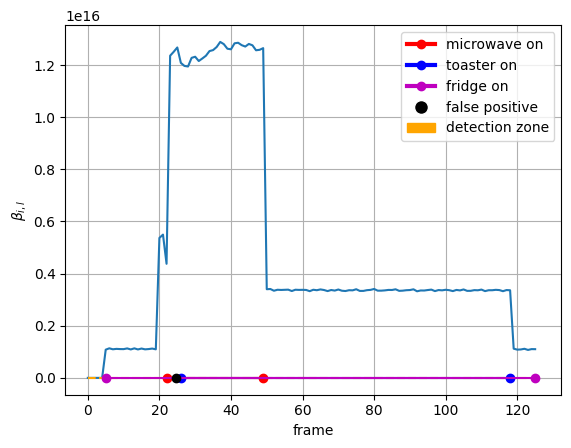

In [111]:
dot_A_referencia_hela_3arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:3]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))
  dot_A_referencia_hela_3arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_hela_3arm))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')


plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Line2D([0], [0], marker='o', color='w', label='false positive',
                          markerfacecolor='black', markersize=10),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)

plt.savefig('indirect_fridge_detection_ds1_final')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(0,0.1)


plt.show()

In [112]:
U=np.array([H_A[0][0:5], H_C[60][0:5], H_B[40][0:5], H_D[30][0:5]])

In [113]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])


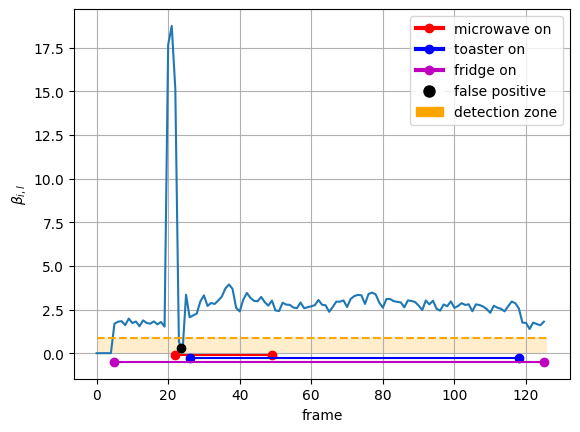

In [114]:
dot_A_referencia_hela_5arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:5]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))
  dot_A_referencia_hela_5arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_hela_5arm))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')


plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.plot(23.7,0.3, marker="o", color="black",label='false positive')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Line2D([0], [0], marker='o', color='w', label='false positive',
                          markerfacecolor='black', markersize=10),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)

plt.savefig('indirect_fridge_detection_ds1_final')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(0,0.1)


plt.show()


In [115]:
U=np.array([H_A[0][0:10], H_C[60][0:10], H_B[40][0:10], H_D[30][0:10]])

In [116]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

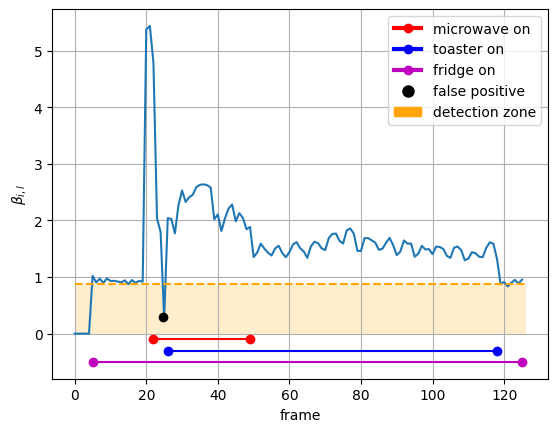

In [117]:
dot_A_referencia_hela_10arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:10]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))
  dot_A_referencia_hela_10arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_hela_10arm))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')


plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Line2D([0], [0], marker='o', color='w', label='false positive',
                          markerfacecolor='black', markersize=10),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)

plt.savefig('indirect_fridge_detection_ds1_final')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(0,0.1)


plt.show()

In [118]:
U=np.array([H_A[0][0:30], H_C[60][0:30], H_B[40][0:30], H_D[30][0:30]])

In [119]:
v1=U[0]

v2= U[1] - (np.dot(U[1], v1)/np.linalg.norm(v1)**2)*v1

v3= U[2] - (np.dot(U[2], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[2], v2)/np.linalg.norm(v2)**2)*v2

v4=U[3]- (np.dot(U[3], v1)/np.linalg.norm(v1)**2)*v1 - (np.dot(U[3], v2)/np.linalg.norm(v2)**2)*v2 - (np.dot(U[3],v3)/np.linalg.norm(v3)**2)*v3


#V=np.array([v1/np.linalg.norm(v1), v2/np.linalg.norm(v2), v3/np.linalg.norm(v3), v4/np.linalg.norm(v4)])

V=np.array([v1,v2,v3,v4])

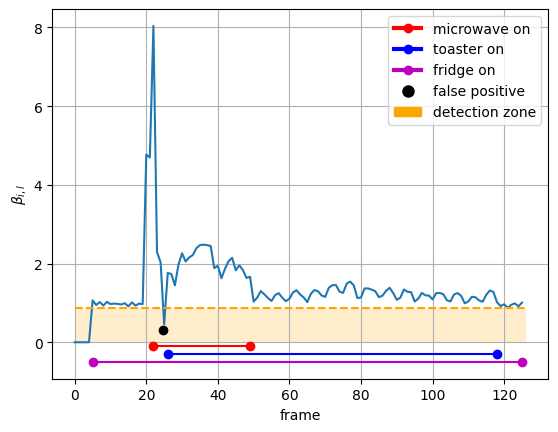

In [120]:
dot_A_referencia_hela_30arm=[]
i=0
while i<len(windows):

  #A=windows_t[i]['AIValor[Amperios]']
  #if i==85 or i==86 or i==87 or i==106 or i==107:

  A=H_A[i][0:30]
  #else:
   # A=windows_t[i]['AIValor[Amperios]']
  #D=all_complex_D[i].flatten()
  x=np.dot(V[3], A)/(np.dot(V[3], V[3]))
  dot_A_referencia_hela_30arm.append(x)

  i=i+1
plt.plot(np.abs(dot_A_referencia_hela_30arm))
#plt.title('Toaster detection with k=30')



plt.xlabel('frame')
plt.ylabel(r'$\beta_{i,l}$')

#plt.title('TV LED detection with $k \in [0,30]$ and aggregate reference $A_{67}$')

plt.grid()

#plt.plot([5,57],[0.5,0.5],'o-g', label='TV LED')

#plt.plot([57,67],[0.75,0.75],'o-r', label='false active frame detection')

#plt.plot([0,126],[0,0],'--', color='orange', label='inactive frame')

plt.plot([0,126],[0.88,0.88],'--',color='orange', label='detection zone')

#plt.plot([0,89],[0.25,0.25],'--', color='orange')

#plt.plot([5,125],[1.3,1.3],'o-m', label='toaster on')

#plt.plot([3,89],[-0.20,-0.20],'o-m', label='only fridge ON')

#plt.plot([56,82],[-0.3,-0.3],'o-b', label='only toaster ON')

#plt.plot([30,59],[-0.4,-0.4],'o-g', label='only microwave ON')

#plt.plot([0,77],[0,0],'--', label='low level')

plt.plot([22,49], [-0.1,-0.1], 'o-r', label='microwave on')

plt.plot([26,118], [-0.3,-0.3], 'o-b', label='toaster on')

plt.plot([5,125], [-0.5,-0.5], 'o-m', label='fridge on')


plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)


plt.plot(24.7,0.3, marker="o", color="black",label='false positive')

legend_elements = [Line2D([0], [0], marker='o',color='red', lw=3, label='microwave on'),
                   Line2D([0], [0], marker='o',color='blue', lw=3, label='toaster on'),
                   Line2D([0], [0], marker='o',color='m',lw=3, label='fridge on'),
                   Line2D([0], [0], marker='o', color='w', label='false positive',
                          markerfacecolor='black', markersize=10),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='detection zone')]

plt.legend(handles=legend_elements, loc='best')
#fig, ax = plt.subplots()
#red_patch = mpatches.Patch(color='red', label='The red data')
#ax.legend(handles=[red_patch])



#plt.legend()

#handles = [
 #   Patch(facecolor=color, label=label)
  #  for label, color in zip(SPECIES_, COLORS)
#]

#ax.legend(handles=handles);
#plt.ylim(0,0.1)

plt.savefig('indirect_fridge_detection_ds1_final')

#plt.plot(24.7,0.3, marker="o", color="black",label='false positive')
#plt.ylim(0,0.1)


plt.show()

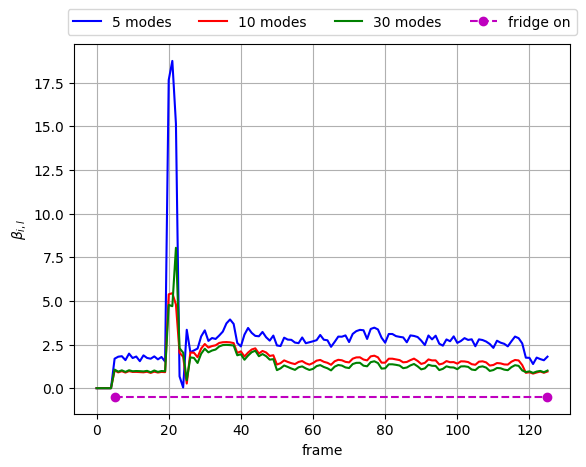

In [121]:
plt.plot(np.abs(dot_A_referencia_hela_5arm), color='blue',label='5 modes')
plt.plot(np.abs(dot_A_referencia_hela_10arm), color='red', label='10 modes')
plt.plot(np.abs(dot_A_referencia_hela_30arm), color='green', label='30 modes')


plt.ylabel(r'$\beta_{i,l}$')
plt.xlabel('frame')

#plt.fill_between([0, 126], [0, 0], [1.1, 1.1], facecolor="orange", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [0.88, 0.88], facecolor="orange", alpha=0.2)

#plt.fill_between([0, 126], [0, 0], [0.7, 0.7], facecolor="orange", alpha=0.2)

#plt.plot([0,77],[0,0],'--', label='low level')

#red_patch = mpatches.Patch(color='orange', label='detection zone')
#plt.legend(handles=[red_patch])
legend_elements = [Line2D([0], [0], marker='o',color='blue', lw=3, label='30 modes'),
                   Line2D([0], [0], marker='o',color='red', lw=3, label='10 modes'),
                   Line2D([0], [0], marker='o',color='green',lw=3, label='5 modes'),]
                   #Patch(facecolor='orange', edgecolor='orange',
                    #     label='detection zone')]



#plt.legend(handles=legend_elements, loc='best')
plt.plot([5,125], [-0.5,-0.5], 'o--m', label='fridge on')
plt.legend(ncol=4, loc='center', bbox_to_anchor=(0.5, 1.06))

plt.grid()



plt.savefig('fridge_comparison_11')



#plt.legend()

